#                                      MIS 665 FINAL PROJECT

## Section 1: Business Understanding

In [419]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as stats
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import plotly
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#Model selection/Train/Test Split
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 


#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

% matplotlib inline

In [420]:
df = pd.read_csv('data/movie_metadata.csv')
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

          ...          num_user_for_reviews language  country  content_rating  \
0         ...                        3054.0  English      USA           PG-13   
1         ...                        1238.0  English      USA           PG-13   
2         ...                         994.0  English       UK           PG-13   
3         ...                        2701.0  English      USA           PG-13   
4         ...                           NaN      NaN      NaN             NaN   

        budget  title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0  237000000.0      2009.0                  936.0        7.9          1.78   
1  300000000.0      2007.0                 5000.0        7.1          2.35   
2  245000000.0      2015.0                  393.0        6.8          2.35   
3  250000000.0      2012.0                23000.0        8.5          2.35   
4          NaN         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

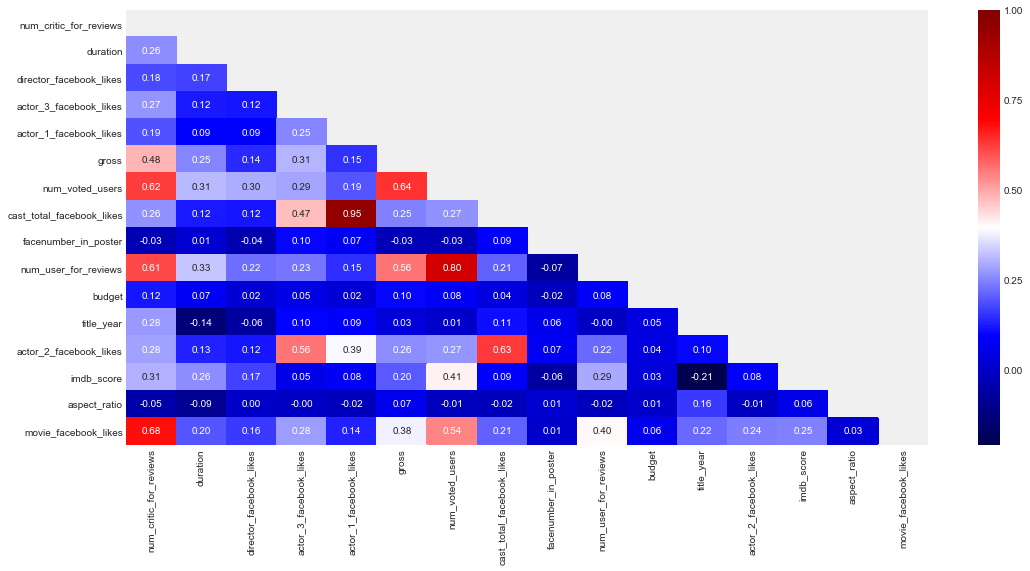

In [421]:
#Preliminary Correlation Analysis

import numpy as np

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, cmap='seismic', fmt = '.2f', mask=mask)

This business problem can best be described as trying to understand the factors that lead a movie to be successful in terms of its IMDB score. There are three main components to this project. 

1. We want to take the data that we already do have, and use it to make predictions about new movies that come out so that we can hopefully and accurately predict the movie's score on IMDB.

2. The kind of data we will need to build a good model would be the Actors in the movie, the director, what the budget for the movie was, how much money it made at the box office, how long the movie is, and what genre the movie is.

3. The top 3 variables that are most highly correlated with IMDB score are "num_voted_users", "num_critic_for_reviews", and "num_users_for_reviews"

## Section 2: Data Understanding

In [422]:
#Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [423]:
#Data Quality Issues
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [424]:
#Describing the data

df.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

#### Value Counts for Variables thought to be Important to IMDB Score

In [425]:
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

In [426]:
df['country'].value_counts().head(10)

USA          3807
UK            448
France        154
Canada        126
Germany        97
Australia      55
India          34
Spain          33
China          30
Italy          23
Name: country, dtype: int64

In [427]:
df['language'].value_counts().head(10)

English      4704
French         73
Spanish        40
Hindi          28
Mandarin       26
German         19
Japanese       18
Cantonese      11
Russian        11
Italian        11
Name: language, dtype: int64

## Section 3: Data Preprocessing

In [428]:
#Identifying Missing Values
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

### Section 3.1 Identifying what kinds of values exist in the non-numerica data like Rating, Country etc.

In [429]:
df.groupby('genres').size()

genres
Action                                                             11
Action|Adventure                                                   11
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy              1
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller     1
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi               2
Action|Adventure|Animation|Comedy|Family                            6
Action|Adventure|Animation|Comedy|Family|Fantasy                    4
Action|Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi             2
Action|Adventure|Animation|Comedy|Family|Sci-Fi                     3
Action|Adventure|Animation|Comedy|Fantasy                           1
Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi                    1
Action|Adventure|Animation|Comedy|Sci-Fi                            1
Action|Adventure|Animation|Drama|Fantasy|Sci-Fi                     1
Action|Adventure|Animation|Drama|Mystery|Sci-Fi|Thriller            1
Action|Advent

In [430]:
df['country'].value_counts().head()

USA        3807
UK          448
France      154
Canada      126
Germany      97
Name: country, dtype: int64

In [431]:
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

### Section 3.2 Data Cleaning and Transformation

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

#### Section 3.2.1 Filling in Missing Values in the Data

In [433]:
df['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [434]:
df['color'].replace({'Color':1, " Black and White":0}, inplace=True)

In [435]:
df['color'].fillna(1, inplace=True)

In [436]:
df.groupby('color').size()

color
0.0     209
1.0    4834
dtype: int64

In [437]:
df['color'] = df['color'].astype(int)

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5043 non-null int32
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-n

In [439]:
df.isnull().sum()

color                          0
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [440]:
df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].mean(), inplace=True)

In [441]:
df['duration'].fillna(df['duration'].mean(), inplace=True)

In [442]:
# Replacing NA values with zero because some directors definitely dont have FB
df['director_facebook_likes'].fillna(0, inplace=True)

In [443]:
# Replacing NA values with zero because some actors definitely dont have FB
df['actor_3_facebook_likes'].fillna(0, inplace=True)

In [444]:
# Replacing NA values with zero because some actors definitely dont have FB
df['actor_2_facebook_likes'].fillna(0, inplace=True)

In [445]:
# Replacing NA values with zero because some actors definitely dont have FB
df['actor_1_facebook_likes'].fillna(0, inplace=True)

In [446]:
df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].mean(), inplace=True)

In [447]:
df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].mean(), inplace=True)

In [448]:
df['aspect_ratio'].fillna(df['aspect_ratio'].mean(), inplace=True)

In [449]:
# Movies that have a missing rating are replaced with the rating NR which means No Rating or Not Rated
df['content_rating'].fillna('NR', inplace=True)

In [450]:
df.isnull().sum()

color                          0
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                      12
country                        5
content_rating                 0
budget                       492
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [451]:
df['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Korean           8
Portuguese       8
Arabic           5
Swedish          5
Hebrew           5
Danish           5
Persian          4
Dutch            4
Polish           4
Norwegian        4
Thai             3
Chinese          3
None             2
Zulu             2
Aboriginal       2
Icelandic        2
Romanian         2
Dari             2
Indonesian       2
Urdu             1
Czech            1
Filipino         1
Tamil            1
Slovenian        1
Swahili          1
Aramaic          1
Greek            1
Hungarian        1
Bosnian          1
Kazakh           1
Panjabi          1
Kannada          1
Mongolian        1
Dzongkha         1
Vietnamese       1
Maya             1
Telugu           1
Name: language, dtype: int64

In [452]:
# Filling NA with English because it is overwhelmingly the most common language in this dataset
df['language'].fillna('English', inplace=True)

In [453]:
df['country'].value_counts()

USA                     3807
UK                       448
France                   154
Canada                   126
Germany                   97
Australia                 55
India                     34
Spain                     33
China                     30
Italy                     23
Japan                     23
Mexico                    17
Hong Kong                 17
New Zealand               15
South Korea               14
Ireland                   12
Russia                    11
Denmark                   11
South Africa               8
Brazil                     8
Norway                     8
Sweden                     6
Thailand                   5
Poland                     5
Netherlands                5
Belgium                    4
Iran                       4
Israel                     4
Argentina                  4
Romania                    4
                        ... 
Greece                     2
Taiwan                     2
Bulgaria                   1
Cambodia      

In [454]:
# Same rationale for replacing nulls with USA, most common country in dataset
df['country'].fillna('USA', inplace=True)

In [455]:
df.isnull().sum()

color                          0
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                       0
country                        0
content_rating                 0
budget                       492
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [456]:
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
NR            303
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

In [457]:
# Consolidating the number of Ratings

df['content_rating'].replace({'Unrated': 'NR', 'Not Rated':'NR', 'Approved':'NR', 'Passed':'NR', 'GP':'G', 'M':'R', 'TV-Y7':'G','TV-Y':'G', 'X':'R', 'TV-14': 'PG-13', 'TV-MA': 'R', 'TV-PG':'PG', 'TV-G':'G', 'NC-17':'R'}, inplace=True)

In [458]:
df['content_rating'].value_counts()

R        2163
PG-13    1491
PG        714
NR        545
G         130
Name: content_rating, dtype: int64

#### Section 3.2.2 Transforming certain predictor variables

In [459]:
# Some movies have entirely too many genres that they fall under, so I am going to have only one genre category 
# per movie, and I am going to replace the entire list of genres for a movie with the first genre in that list, as 
# the first listed genre of the movie is most likely to describe it correctly.
df['genres'] = df['genres'].str.strip()
df['genres'].head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
4                        Documentary
Name: genres, dtype: object

In [460]:
df['genres'] = df['genres'].str.replace('|', " ")
df.genres.head()

0    Action Adventure Fantasy Sci-Fi
1           Action Adventure Fantasy
2          Action Adventure Thriller
3                    Action Thriller
4                        Documentary
Name: genres, dtype: object

In [461]:
df['genres'] = df['genres'].str.split()
df.genres.head()

0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
4                           [Documentary]
Name: genres, dtype: object

In [462]:
# Simplifying the categories of genres
df['genres'] = df['genres'].map(lambda x: x[0])

In [463]:
# Checking to make sure the previous cell worked
df['genres'].head()

0         Action
1         Action
2         Action
3         Action
4    Documentary
Name: genres, dtype: object

In [464]:
# Greatly reduced the number of genres
df['genres'].value_counts()

Comedy         1329
Action         1153
Drama           972
Adventure       453
Crime           349
Biography       252
Horror          232
Documentary      84
Animation        61
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Game-Show         1
Music             1
History           1
Film-Noir         1
Name: genres, dtype: int64

In [465]:
df['genres'].isnull().sum()

0

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5043 non-null int32
director_name                4939 non-null object
num_critic_for_reviews       5043 non-null float64
duration                     5043 non-null float64
director_facebook_likes      5043 non-null float64
actor_3_facebook_likes       5043 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5043 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5043 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-n

#### Section 3.2.3 Deleting predictors that are likely unimportant

#### I have replaced all of the missing values that I believe can be reasonably replaced, and I have consolidated any data that needed to be reduced, now I think everything else that is missing is relatively unimportant and those rows or columns can be dropped from the dataset.

In [467]:
df.dropna(inplace=True)

In [468]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 5042
Data columns (total 28 columns):
color                        3851 non-null int32
director_name                3851 non-null object
num_critic_for_reviews       3851 non-null float64
duration                     3851 non-null float64
director_facebook_likes      3851 non-null float64
actor_3_facebook_likes       3851 non-null float64
actor_2_name                 3851 non-null object
actor_1_facebook_likes       3851 non-null float64
gross                        3851 non-null float64
genres                       3851 non-null object
actor_1_name                 3851 non-null object
movie_title                  3851 non-null object
num_voted_users              3851 non-null int64
cast_total_facebook_likes    3851 non-null int64
actor_3_name                 3851 non-null object
facenumber_in_poster         3851 non-null float64
plot_keywords                3851 non-null object
movie_imdb_link              3851 non-n

#### Now we have 3851 observations on which to perform our analysis

## Section 4: Business Intelligence

### Section 4.1: Relationship between the total number of users that voted for a movie and its IMDB Score


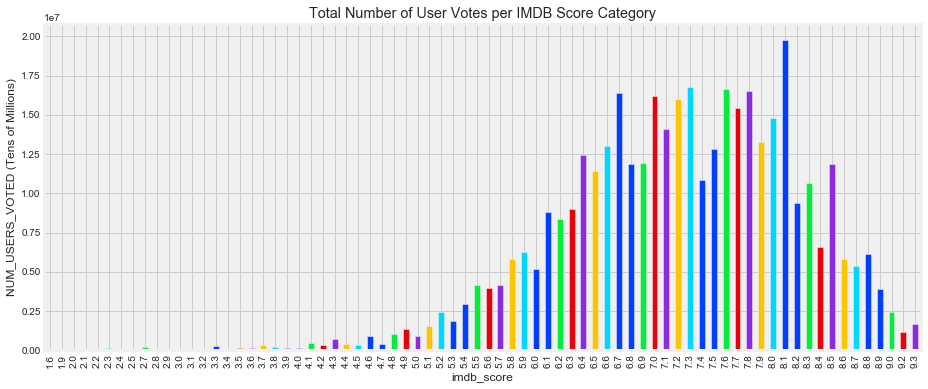

In [470]:
# Relationship between the total number of users that voted for a movie and its IMDB Score
style.use('seaborn-bright')
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize=[14,6])
plt.xlabel('IMDB_SCORE')
plt.ylabel('NUM_USERS_VOTED (Tens of Millions)')
plt.title('Total Number of User Votes per IMDB Score Category')
df.groupby('imdb_score')['num_voted_users'].sum().plot(kind='bar')

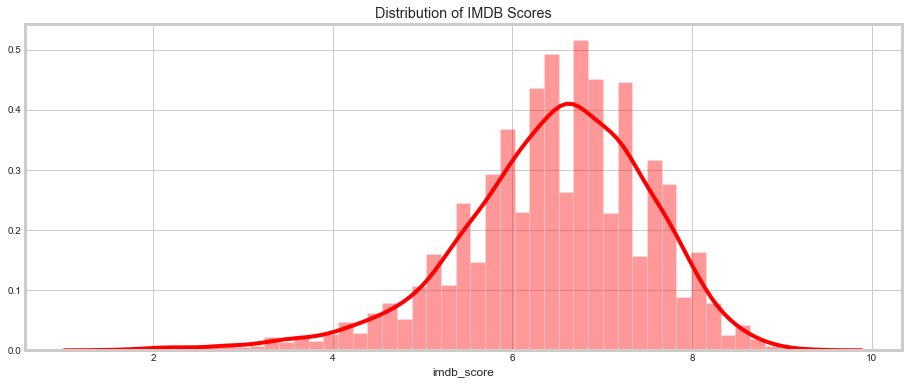

In [577]:
# Distribution of IMDB Scores
plt.figure(figsize=(14,6))
plt.title('Distribution of IMDB Scores')
sns.set_style('whitegrid')
sns.distplot(df['imdb_score'],color='red')

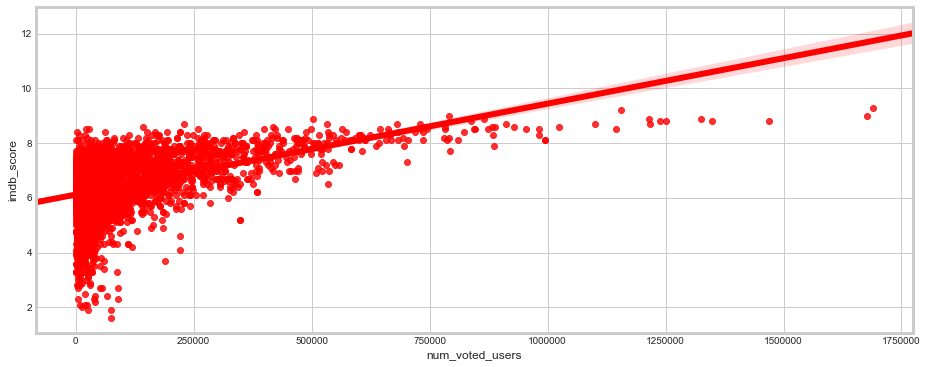

In [472]:
plt.figure(figsize=(14,6))
sns.regplot(y='imdb_score',x='num_voted_users',data=df, color='red')

### Section 4.2: Relationship between the average number of users that voted for a movie by its IMDB Score Category


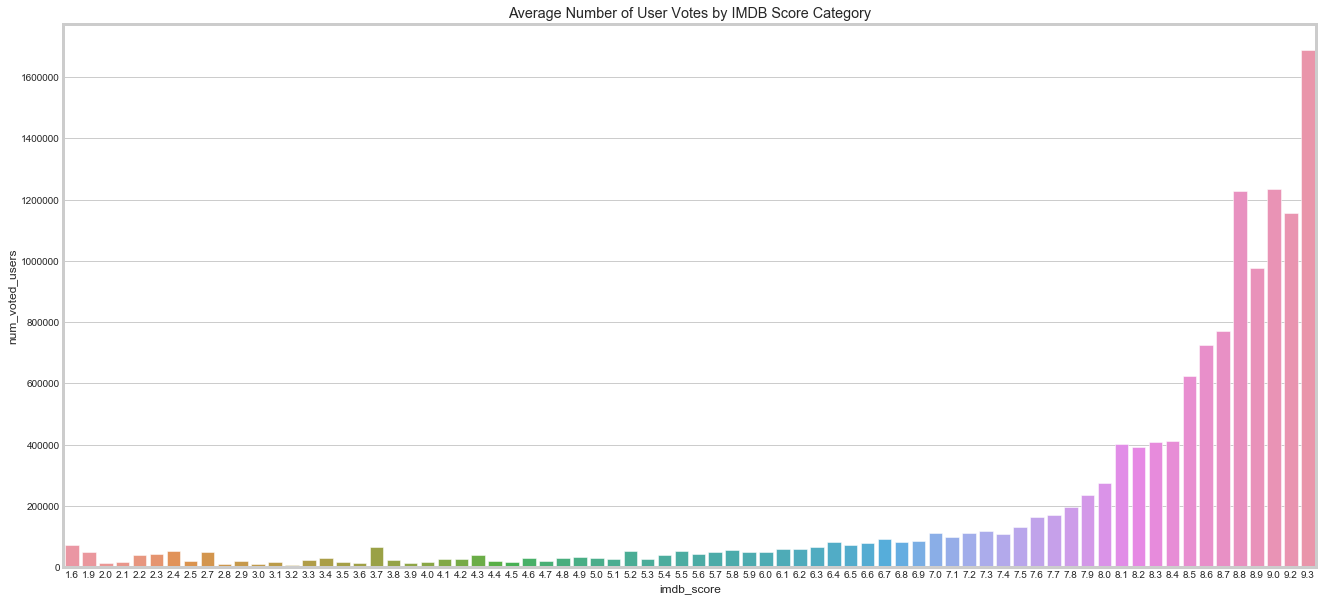

In [473]:
plt.figure(figsize=[20,10])
plt.ylabel('Average User Votes')
plt.title('Average Number of User Votes by IMDB Score Category')
sns.barplot(x='imdb_score',y='num_voted_users',data=df, errwidth=0)

### Section 4.3: Relationship between the average duration of a movie and its IMDB Score


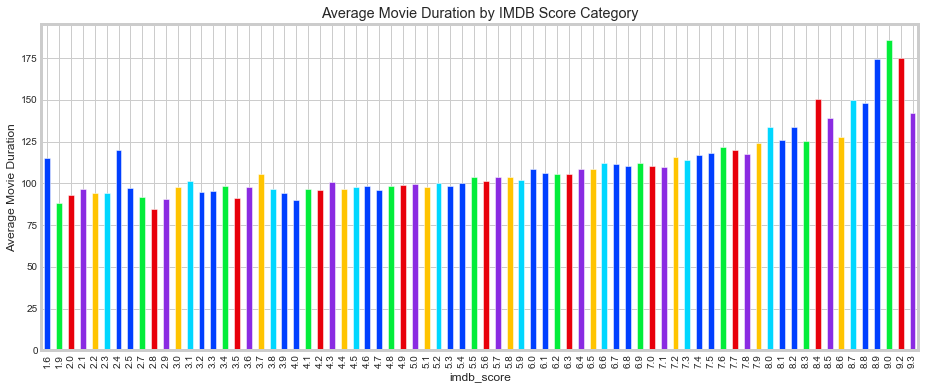

In [474]:
plt.figure(figsize=[14,6])
plt.title('Average Movie Duration by IMDB Score Category')
plt.ylabel('Average Movie Duration')
df.groupby('imdb_score')['duration'].mean().plot(kind='bar')

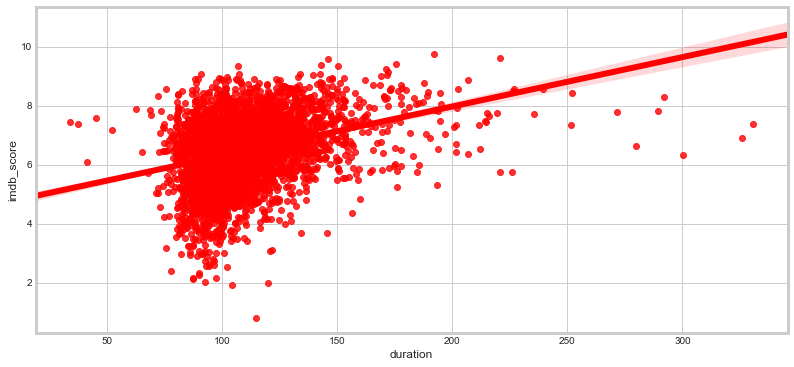

In [475]:
plt.figure(figsize=(12,6))
sns.regplot(x='duration',y='imdb_score',data=df,color='red', x_jitter=.9, y_jitter=.9)

### Section 4.4: Average IMDB Movie Scores by Country


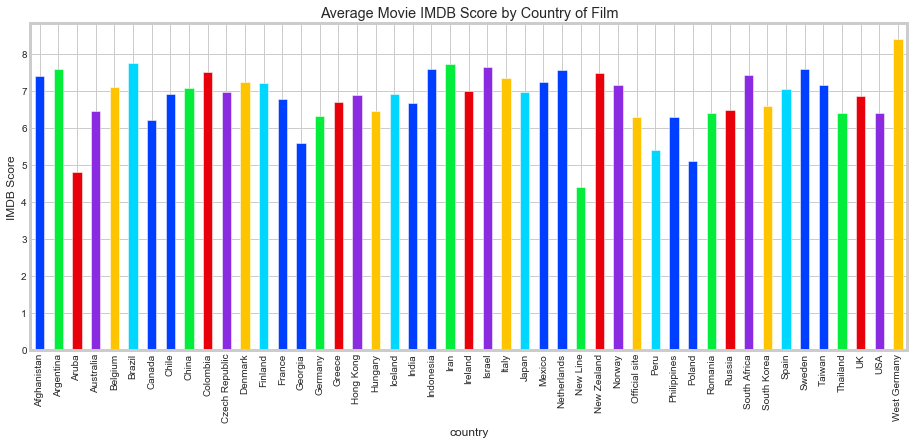

In [476]:
plt.figure(figsize=[14,6])
plt.title('Average Movie IMDB Score by Country of Film')
plt.xlabel('Country')
plt.ylabel('IMDB Score')
df.groupby('country')['imdb_score'].mean().plot(kind='bar')

### Section 4.5: Average IMDB Score by Movie Genre

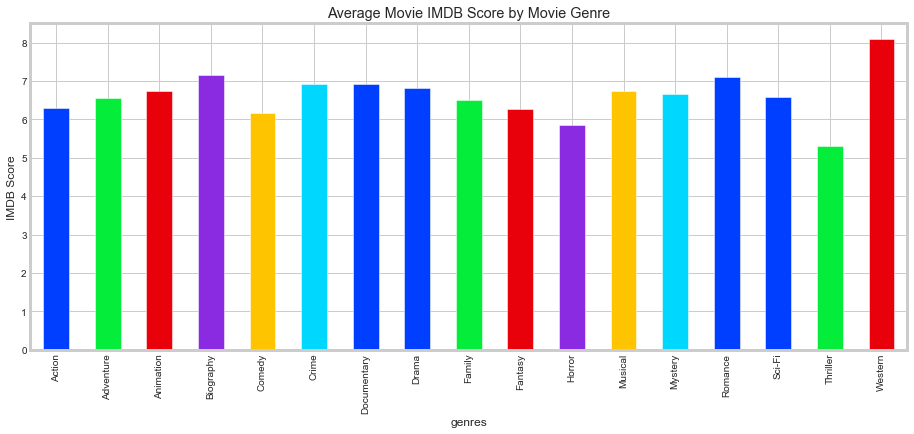

In [477]:
plt.figure(figsize=[14,6])
plt.title('Average Movie IMDB Score by Movie Genre')
plt.xlabel('Genre')
plt.ylabel('IMDB Score')
df.groupby('genres')['imdb_score'].mean().plot(kind='bar')

### Section 4.6: Relationship between the Average Number of Facebook Likes a Movie has and its IMDB Score

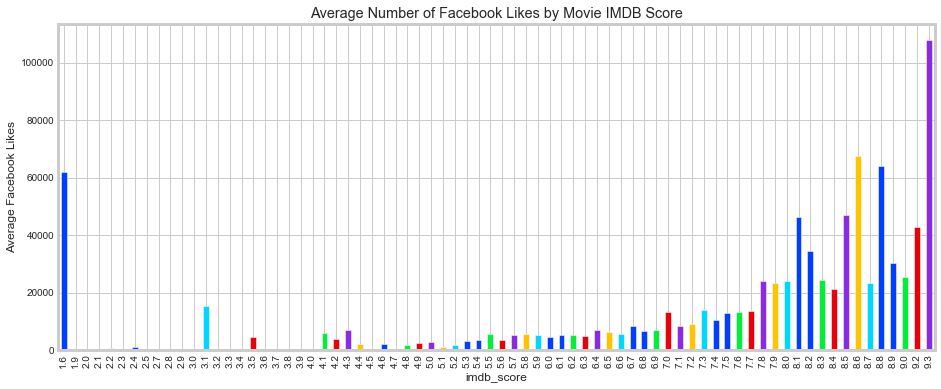

In [478]:
plt.figure(figsize=[14,6])
plt.title('Average Number of Facebook Likes by Movie IMDB Score')
plt.ylabel('Average Facebook Likes')
df.groupby('imdb_score')['movie_facebook_likes'].mean().plot(kind='bar')

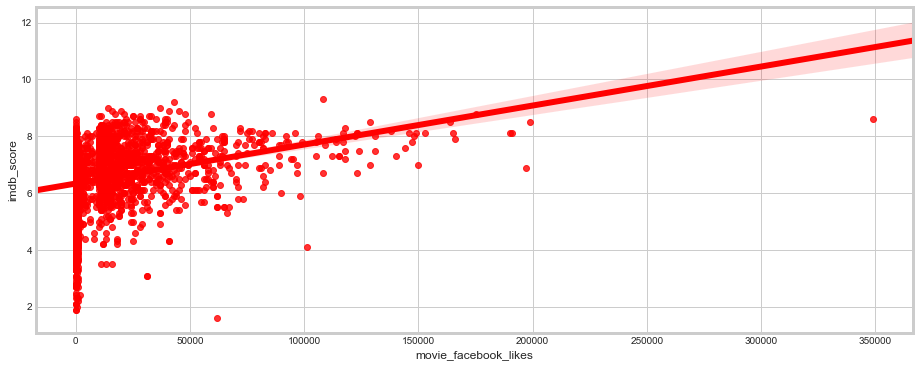

In [479]:
plt.figure(figsize=(14,6))
sns.regplot('movie_facebook_likes', 'imdb_score', df, color='red')

### Section 4.7: Relationship between the Average Budget a movie had and its IMDB Score

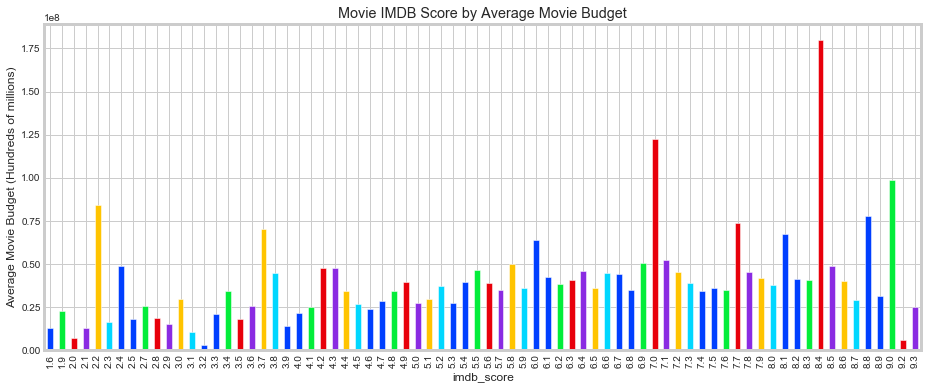

In [480]:
plt.figure(figsize=[14,6])
plt.title('Movie IMDB Score by Average Movie Budget')
plt.ylabel('Average Movie Budget (Hundreds of millions)')
df.groupby('imdb_score')['budget'].mean().plot(kind='bar')

### Section 4.8: Relationship between the Average Gross Revenue a movie had and its IMDB Score

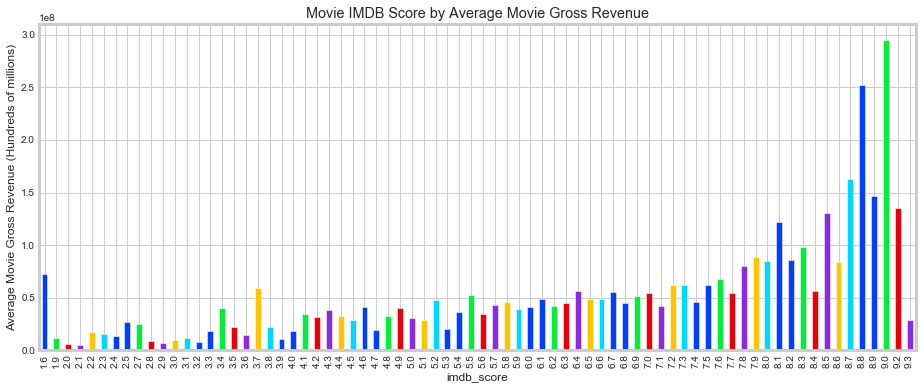

In [481]:
plt.figure(figsize=[14,6])
plt.title('Movie IMDB Score by Average Movie Gross Revenue')
plt.ylabel('Average Movie Gross Revenue (Hundreds of millions)')
df.groupby('imdb_score')['gross'].mean().plot(kind='bar')

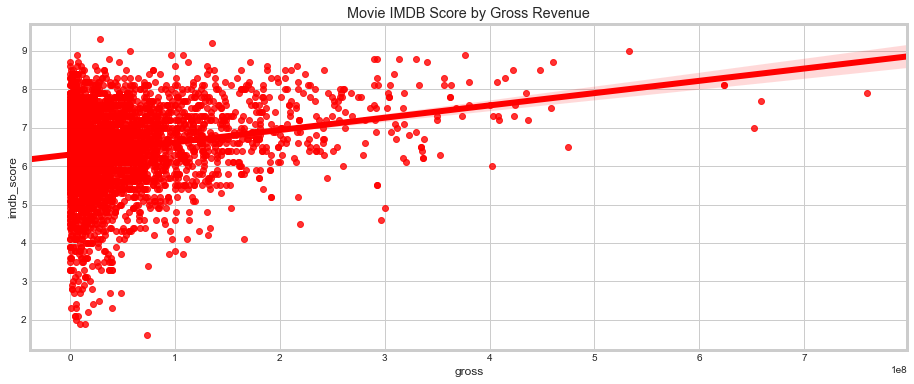

In [482]:
plt.figure(figsize=[14,6])
plt.title('Movie IMDB Score by Gross Revenue')
plt.xlabel('Gross Revenue (Hundreds of millions)')
sns.regplot(x='gross',y='imdb_score',data=df,color='red')

### Section 4.9: Relationship between the Average IMDB Score by Movie Content Rating Category

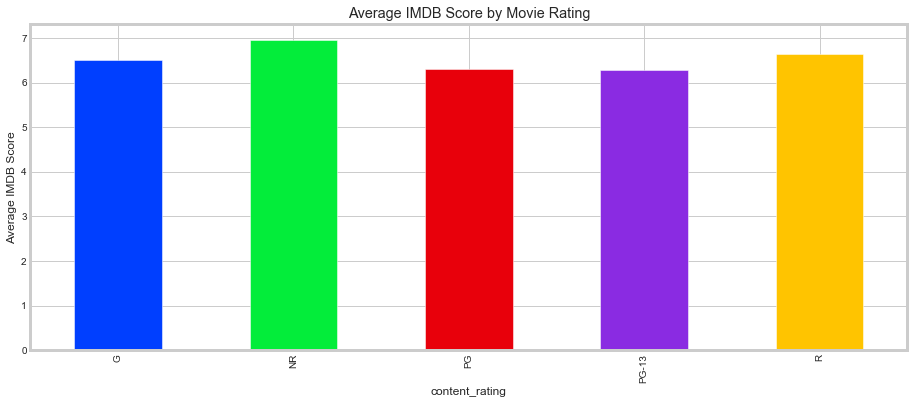

In [483]:
plt.figure(figsize=[14,6])
plt.title('Average IMDB Score by Movie Rating')
plt.ylabel('Average IMDB Score')
df.groupby('content_rating')['imdb_score'].mean().plot(kind='bar')

### Section 4.10: Relationship between the Movie's Language and its IMDB Score

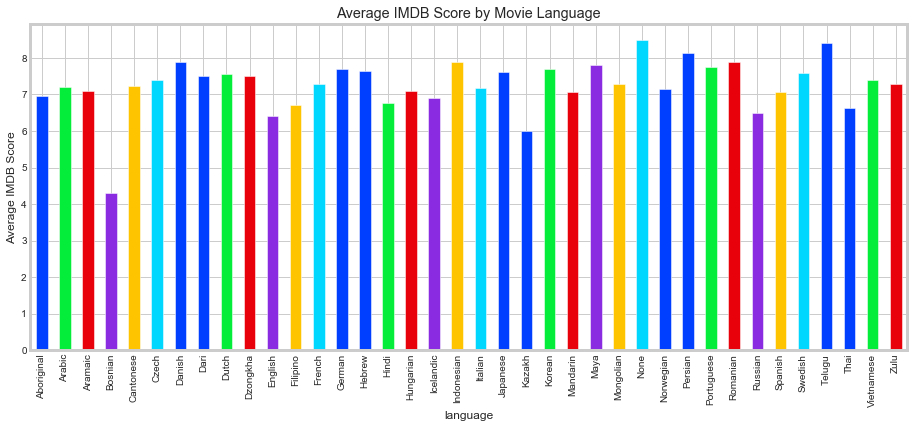

In [484]:
plt.figure(figsize=[14,6])
plt.title('Average IMDB Score by Movie Language')
plt.ylabel('Average IMDB Score')
df.groupby('language')['imdb_score'].mean().plot(kind='bar')

### Section 4.11: Relationship between the Average number of Critical Reviews a movie received and its IMDB Score

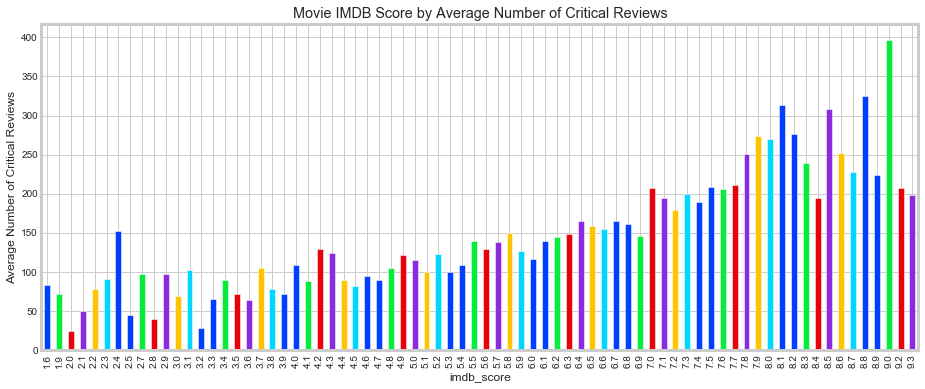

In [485]:
plt.figure(figsize=[14,6])
plt.title('Movie IMDB Score by Average Number of Critical Reviews')
plt.ylabel('Average Number of Critical Reviews')
df.groupby('imdb_score')['num_critic_for_reviews'].mean().plot(kind='bar')

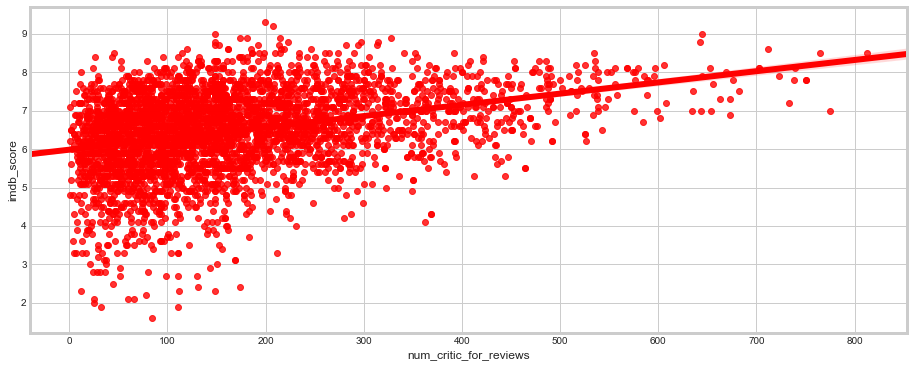

In [486]:
plt.figure(figsize=(14,6))
sns.regplot('num_critic_for_reviews', 'imdb_score', df, color='red')

### Section 4.12: Relationship between the Average number of Critical Reviews a movie received and its IMDB Score

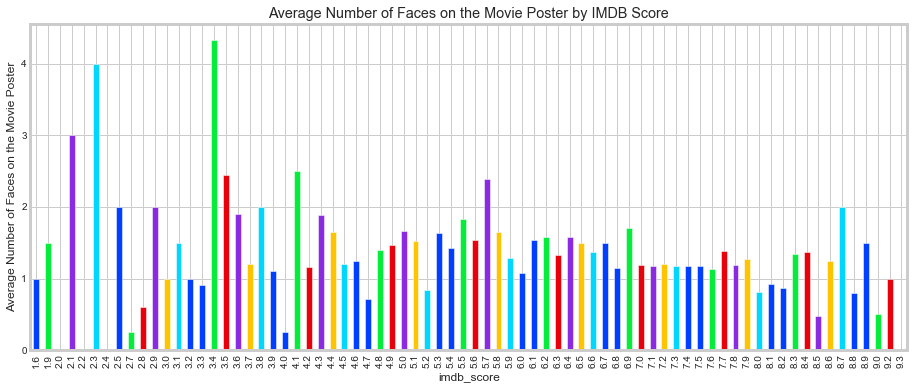

In [487]:
plt.figure(figsize=[14,6])
plt.title('Average Number of Faces on the Movie Poster by IMDB Score')
plt.ylabel('Average Number of Faces on the Movie Poster')
df.groupby('imdb_score')['facenumber_in_poster'].mean().plot(kind='bar')

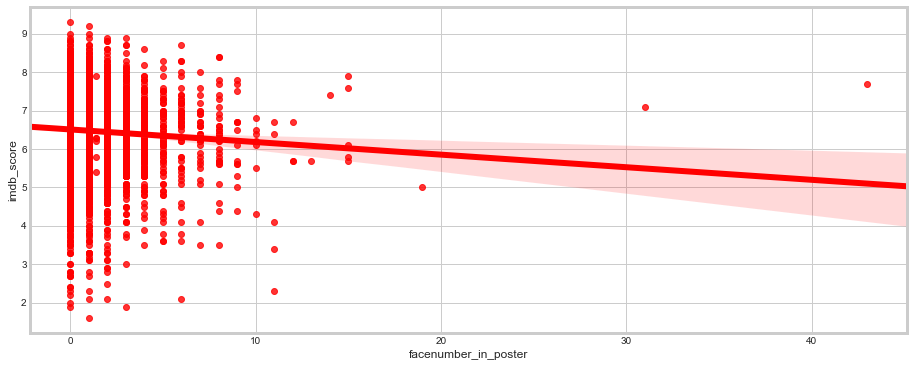

In [488]:
plt.figure(figsize=(14,6))
sns.regplot(x='facenumber_in_poster', y='imdb_score',data=df, color='red')

### Section 4.13: Relationship between the Average number of Director Facebook Likes and its IMDB Score

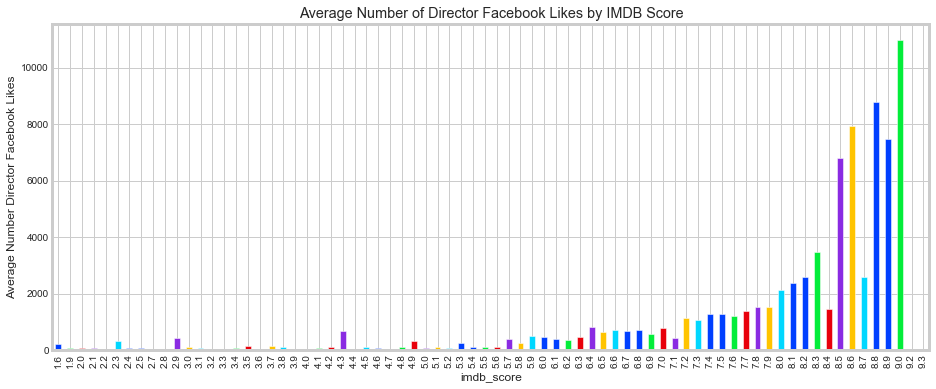

In [489]:
plt.figure(figsize=[14,6])
plt.title('Average Number of Director Facebook Likes by IMDB Score')
plt.ylabel('Average Number Director Facebook Likes')
df.groupby('imdb_score')['director_facebook_likes'].mean().plot(kind='bar')

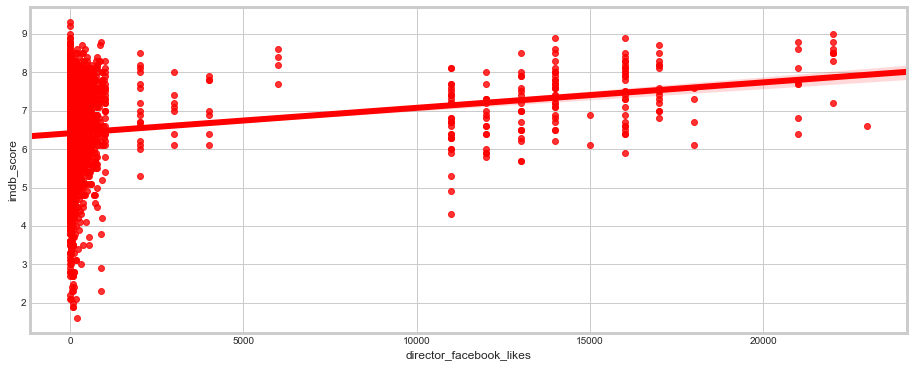

In [490]:
plt.figure(figsize=(14,6))
sns.regplot('director_facebook_likes', 'imdb_score', df, color='red')

## Section 5: Correlation Analysis

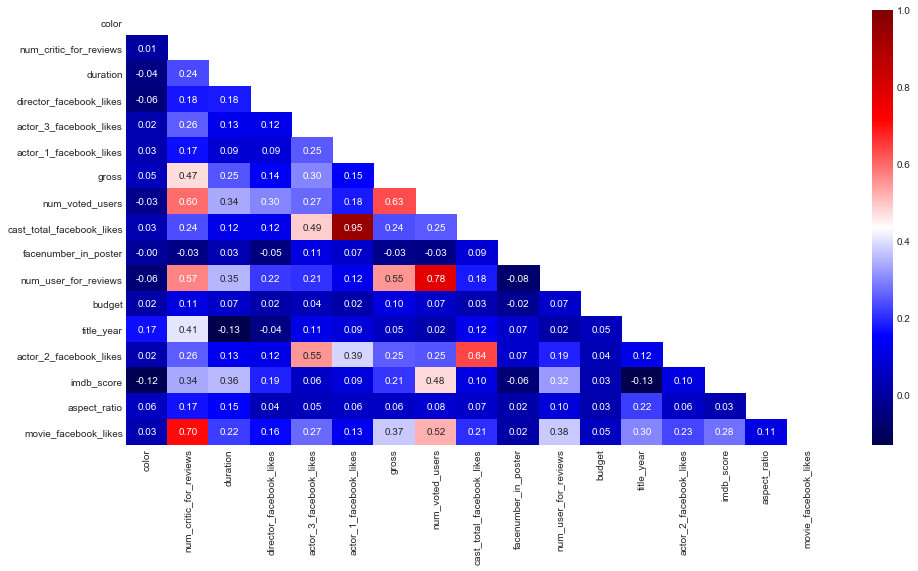

In [491]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, cmap='seismic', fmt = '.2f', mask=mask)

##### Based on this correlation matrix, it appears that the 3 variables that are most highly correlated with IMDB Score are as follows:
                1. Num_Voted_Users with an r value of 0.41
                2. Num_critic_for_reviews with an r value of 0.30
                3. Num_users_for_reviews with an r value of 0.29

##### The top 3 variables that are most highly correlated with the 3 variables above are as follows:
                1. The top 3 variables that are most highly correlated with Num_Voted_Users are:
                   1a: Num_users_for_reviews with an r value of 0.8, which means they are strongly
                       positively linearly related
                   1b: Gross with an r value of 0.64
                   1c: Num_critic_for_reviews with an r value of 0.62
                   
                2. The top 3 variables that are most highly correlated with Num_critic_for_reviews are:
                   2a: Movie facebook likes with an r value of 0.68
                   2b: Num_voted_users with an r value of 0.62
                   2c: Num_users_for_reviews with an r value of 0.61
                   
                3. The top 3 variables that are most highly correlated with Num_users_for_reviews are:
                   3a: Num_voted_users with an r value of 0.8
                   3b: Num_critic_for_review with an r value of 0.61
                   3c: Gross with an r value of 0.56

## Section 6: Business Intelligence and EDA Storytelling and Conclusions

#### Based on the business intelligence and preliminary analysis performed on this dataset, we can conclude a few major things.


1: The total number of users that voted for a movie had an impact on the movie's score. 

     -In general, the higher the total number of users that voted for a movie, the higher 
      its score, up to a point. After a movie had a score of about 8.5, the total number of users 
      that voted started to taper off. The average number of users that voted per IMDB score 
      category was also important. In general, the higher a movie's score, the higher the number 
      of people that voted on average.

2: Facebook Likes were important.
    
    -Movies that had a higher score also had a greater number of likes on Facebook on average than movies 
     that had a lower score. There is a moderately strong positive correlation between the number of 
     facebook likes and the IMDB score that a movie receives, leading us to believe that more facebook 
     likes are more likely to lead to a higher score.
    
3: The amount of gross revenue matters.

    -Movies that had a higher IMDB score tended to have higher gross revenues on average than those movies 
     with a lower score. This makes sense, because if movies made more gross revenue, that means that more 
     people went to see the movie in theaters or bought the movie on DVD, which means that it is more 
     likely to be a good movie.
     
     
4: Critics' opinions matter.

    -There appeared to be a pretty strong relationship between IMDB score and the number of critical reviews 
     a movie received. As a movie got more and more reviews from critics, the score tended to be higher 
     on average than those movies that did not have as many critical reviews, leading one to draw the 
     conclusion that the more press and media attention that a film recieves, the more likely it is 
     to have a higher IMDB score.
     
5: The Director's popularity plays a factor.
     
     -Director popularity on Facebook tended to help movies get higher scores. Those movies that had 
      high scores also had directors that on average had a higher number of facebook likes than 
      directors of movies that had lower scores. This makes sense because directors that are popular
      tend to make good movies on a pretty consistent basis, which is why they are popular.
      
6: Some predictor variables had little to no impact on a movie's IMDB score.

    -The following factors had little to no impact on a movie's final score.
            
            1. Movie Duration
            2. Country that the movie was produced
            3. Genre
            4. Average Budget was relatively similar across all scores
            5. Content rating did not impact a movie's score at all
            6. Language was not a predictor of score
            7. The number of faces on the movie poster also had no impact on the movie's IMDB score
     


## Section 7: Regression Analysis

### Section 7.1: Preprocessing Data for Regression Analysis

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 5042
Data columns (total 28 columns):
color                        3851 non-null int32
director_name                3851 non-null object
num_critic_for_reviews       3851 non-null float64
duration                     3851 non-null float64
director_facebook_likes      3851 non-null float64
actor_3_facebook_likes       3851 non-null float64
actor_2_name                 3851 non-null object
actor_1_facebook_likes       3851 non-null float64
gross                        3851 non-null float64
genres                       3851 non-null object
actor_1_name                 3851 non-null object
movie_title                  3851 non-null object
num_voted_users              3851 non-null int64
cast_total_facebook_likes    3851 non-null int64
actor_3_name                 3851 non-null object
facenumber_in_poster         3851 non-null float64
plot_keywords                3851 non-null object
movie_imdb_link              3851 non-n

In [493]:
df = pd.get_dummies(df,columns=['content_rating','genres'],prefix=['rating','genre'])
df.head()

color      director_name  num_critic_for_reviews  duration  \
0      1      James Cameron                   723.0     178.0   
1      1     Gore Verbinski                   302.0     169.0   
2      1         Sam Mendes                   602.0     148.0   
3      1  Christopher Nolan                   813.0     164.0   
5      1     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross     actor_1_name      ...       \
0                  1000.0  760505847.0      CCH Pounder      ...        
1                 40000.0  309404152.0      Johnny Depp      ...        
2                 11000.0  200074175.0  Christoph Waltz      ...        
3                 27000.0  448130642.0        Tom Hardy      ...        
5                   640.0   73058679.0     Daryl Sabara      ...        

  genre_Drama  genre_Family  genre_Fantasy genre_Horror  genre_Musical  \
0           0             0              0            0              0   
1           0             0              0            0              0   
2           0             0              0            0              0   
3           0             0              0            0              0   
5           0             0              0            0              0   

  genre_Mystery genre_Romance  genre_Sci-Fi genre_Thriller genre_Western  
0             0             0             0              0             0  
1             0             0             0              0             0  
2             0             0             0              0             0  
3             0             0             0              0             0  
5             0             0             0              0             0  

[5 rows x 48 columns]

In [494]:
df.rename(columns={'rating_PG-13': 'rating_PG13'},inplace=True)
df.head()

color      director_name  num_critic_for_reviews  duration  \
0      1      James Cameron                   723.0     178.0   
1      1     Gore Verbinski                   302.0     169.0   
2      1         Sam Mendes                   602.0     148.0   
3      1  Christopher Nolan                   813.0     164.0   
5      1     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross     actor_1_name      ...       \
0                  1000.0  760505847.0      CCH Pounder      ...        
1                 40000.0  309404152.0      Johnny Depp      ...        
2                 11000.0  200074175.0  Christoph Waltz      ...        
3                 27000.0  448130642.0        Tom Hardy      ...        
5                   640.0   73058679.0     Daryl Sabara      ...        

  genre_Drama  genre_Family  genre_Fantasy genre_Horror  genre_Musical  \
0           0             0              0            0              0   
1           0             0              0            0              0   
2           0             0              0            0              0   
3           0             0              0            0              0   
5           0             0              0            0              0   

  genre_Mystery genre_Romance  genre_Sci-Fi genre_Thriller genre_Western  
0             0             0             0              0             0  
1             0             0             0              0             0  
2             0             0             0              0             0  
3             0             0             0              0             0  
5             0             0             0              0             0  

[5 rows x 48 columns]

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 5042
Data columns (total 48 columns):
color                        3851 non-null int32
director_name                3851 non-null object
num_critic_for_reviews       3851 non-null float64
duration                     3851 non-null float64
director_facebook_likes      3851 non-null float64
actor_3_facebook_likes       3851 non-null float64
actor_2_name                 3851 non-null object
actor_1_facebook_likes       3851 non-null float64
gross                        3851 non-null float64
actor_1_name                 3851 non-null object
movie_title                  3851 non-null object
num_voted_users              3851 non-null int64
cast_total_facebook_likes    3851 non-null int64
actor_3_name                 3851 non-null object
facenumber_in_poster         3851 non-null float64
plot_keywords                3851 non-null object
movie_imdb_link              3851 non-null object
num_user_for_reviews         3851 non-n

In [496]:
df1 = df.drop(['director_name','actor_2_name','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link',
               'language','country'],axis=1)
    
df1 = (df1-df1.mean())/(df1.std()) #Standardizing our values

df1.head()

color  num_critic_for_reviews  duration  director_facebook_likes  \
0  0.187632                4.509447  2.992115                -0.260133   
1  0.187632                1.109835  2.595903                -0.074470   
2  0.187632                3.532361  1.671409                -0.260133   
3  0.187632                5.236205  2.375785                 6.994907   
5  0.187632                2.401849  0.967032                -0.103491   

   actor_3_facebook_likes  actor_1_facebook_likes      gross  num_voted_users  \
0                0.051753               -0.430914  10.130294         5.177327   
1                0.129166                2.097618   3.684497         2.432011   
2               -0.318764                0.217428   2.122280         1.139665   
3               11.874633                1.254774   5.666761         6.884999   
5               -0.121760               -0.454254   0.307355         0.718497   

   cast_total_facebook_likes  facenumber_in_poster      ...        \
0                  -0.343699             -0.671814      ...         
1                   1.947167             -0.671814      ...         
2                   0.017756             -0.185161      ...         
3                   5.022063             -0.671814      ...         
5                  -0.499578             -0.185161      ...         

   genre_Drama  genre_Family  genre_Fantasy  genre_Horror  genre_Musical  \
0    -0.467562     -0.027918      -0.098481     -0.211548      -0.022792   
1    -0.467562     -0.027918      -0.098481     -0.211548      -0.022792   
2    -0.467562     -0.027918      -0.098481     -0.211548      -0.022792   
3    -0.467562     -0.027918      -0.098481     -0.211548      -0.022792   
5    -0.467562     -0.027918      -0.098481     -0.211548      -0.022792   

   genre_Mystery  genre_Romance  genre_Sci-Fi  genre_Thriller  genre_Western  
0      -0.077504      -0.016114      -0.04562       -0.027918      -0.022792  
1      -0.077504      -0.016114      -0.04562       -0.027918      -0.022792  
2      -0.077504      -0.016114      -0.04562       -0.027918      -0.022792  
3      -0.077504      -0.016114      -0.04562       -0.027918      -0.022792  
5      -0.077504      -0.016114      -0.04562       -0.027918      -0.022792  

[5 rows x 39 columns]

In [497]:
df1.rename(columns={'genre_Sci-Fi':'genre_SciFi'},inplace=True)

### Section 7.2: Full Linear Regression Model vs Reduced Model

In [498]:
# Defining our x and y variables. We are dropping our non numeric variables because based on EDA and Data Mining we didnt see any
# significant relationship between imdb scores and those variables.
# Also dropping actor 1,2 and 3 facebook likes because they are highly correlated with total FB likes, and that can cause
# convergence issues for our model

X = df1[['num_critic_for_reviews','duration','director_facebook_likes','gross','num_voted_users','cast_total_facebook_likes',
       'num_user_for_reviews','budget','title_year','rating_R','rating_PG13','rating_PG','rating_G','genre_Action',
        'genre_Animation','genre_Biography','genre_Comedy','genre_Crime','genre_Documentary','genre_Drama','genre_Family',
        'genre_Fantasy','genre_Horror','genre_Musical','genre_Mystery','genre_Romance','genre_SciFi','genre_Thriller']]

y = df['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [499]:
model1 = lm.LinearRegression()
model1.fit(X_train, y_train)   
model1_y = model1.predict(X_test)

In [500]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [ 3.06912066e-01  1.56922654e-01 -9.96491130e-03 -5.61801457e-02
  4.72451110e-01 -5.29161430e-02 -1.62954433e-01  7.43933276e-03
 -2.37234254e-01 -1.11464132e-01 -2.60410839e-01 -1.60115504e-01
 -6.76385104e-02 -1.70546391e-01  4.05823343e-02  1.09975465e-01
 -7.77805137e-02  2.17954354e-02  6.17735536e-02  1.02543391e-01
 -6.18889672e-03 -3.53578402e-02 -1.46620521e-01 -1.88451933e-02
 -2.51455413e-02  2.77555756e-17 -6.28520491e-03 -1.31925931e-02]
y-intercept  6.464058312567439


In [501]:
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

0             1
0      num_critic_for_reviews  3.069121e-01
1                    duration  1.569227e-01
2     director_facebook_likes -9.964911e-03
3                       gross -5.618015e-02
4             num_voted_users  4.724511e-01
5   cast_total_facebook_likes -5.291614e-02
6        num_user_for_reviews -1.629544e-01
7                      budget  7.439333e-03
8                  title_year -2.372343e-01
9                    rating_R -1.114641e-01
10                rating_PG13 -2.604108e-01
11                  rating_PG -1.601155e-01
12                   rating_G -6.763851e-02
13               genre_Action -1.705464e-01
14            genre_Animation  4.058233e-02
15            genre_Biography  1.099755e-01
16               genre_Comedy -7.778051e-02
17                genre_Crime  2.179544e-02
18          genre_Documentary  6.177355e-02
19                genre_Drama  1.025434e-01
20               genre_Family -6.188897e-03
21              genre_Fantasy -3.535784e-02
22               genre_Horror -1.466205e-01
23              genre_Musical -1.884519e-02
24              genre_Mystery -2.514554e-02
25              genre_Romance  2.775558e-17
26                genre_SciFi -6.285205e-03
27             genre_Thriller -1.319259e-02

In [502]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
pd.DataFrame(zip(xcolumns, coef))

0       1
0      num_critic_for_reviews   0.307
1                    duration   0.157
2     director_facebook_likes  -0.010
3                       gross  -0.056
4             num_voted_users   0.472
5   cast_total_facebook_likes  -0.053
6        num_user_for_reviews  -0.163
7                      budget   0.007
8                  title_year  -0.237
9                    rating_R  -0.111
10                rating_PG13  -0.260
11                  rating_PG  -0.160
12                   rating_G  -0.068
13               genre_Action  -0.171
14            genre_Animation   0.041
15            genre_Biography   0.110
16               genre_Comedy  -0.078
17                genre_Crime   0.022
18          genre_Documentary   0.062
19                genre_Drama   0.103
20               genre_Family  -0.006
21              genre_Fantasy  -0.035
22               genre_Horror  -0.147
23              genre_Musical  -0.019
24              genre_Mystery  -0.025
25              genre_Romance   0.000
26                genre_SciFi  -0.006
27             genre_Thriller  -0.013

In [503]:
print "mean square error: ", mean_squared_error(y_test, model1_y)
print "variance or r-squared: ", explained_variance_score(y_test, model1_y)

mean square error:  0.632925807296369
variance or r-squared:  0.4150928830717471


In [504]:
# Full Model

imdb_model1 = ols("imdb_score~num_critic_for_reviews+duration+director_facebook_likes+gross+num_voted_users+cast_total_facebook_likes+num_user_for_reviews+budget+title_year+rating_R+rating_PG13+rating_PG+rating_G+genre_Action+genre_Animation+genre_Biography+genre_Comedy+genre_Crime+genre_Documentary+genre_Drama+genre_Family+genre_Fantasy+genre_Horror+genre_Musical+genre_Mystery+genre_Romance+genre_SciFi+genre_Thriller",df1)
imdb_reg1 = imdb_model1.fit()
print imdb_reg1.summary()

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     104.7
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:37:22   Log-Likelihood:                -4367.9
No. Observations:                3851   AIC:                             8794.
Df Residuals:                    3822   BIC:                             8975.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [505]:
# Reduced Model

imdb_model1 = ols("imdb_score~num_critic_for_reviews+duration+gross+num_voted_users+num_user_for_reviews+title_year+rating_R+rating_PG13+rating_PG+rating_G",df1)
imdb_reg1 = imdb_model1.fit()
print imdb_reg1.summary()

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     217.1
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:37:22   Log-Likelihood:                -4600.8
No. Observations:                3851   AIC:                             9224.
Df Residuals:                    3840   BIC:                             9293.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.44

#### The Full model is much better in terms of both MSE and R-Squared, but it has insignificant predictors. The AIC and BIC of the reduced model are higher, so I think the reduced model is better even though it explains less of the variance than the full model.

### Section 7.4: F_Regression

In [506]:
# F_Regression with 5 features. Trying with 5 first, then sequentially adding one additional feature each time until
# The improvement in R-Squared is almost zero
X_new = SelectKBest(f_regression, k=5).fit_transform(X, y)

In [507]:
model3 = lm.LinearRegression()
model3.fit(X_new, y)
model3_y = model3.predict(X_new)

print "mean square error: ", mean_squared_error(y, model3_y)
print "variance or r-squared: ", explained_variance_score(y, model3_y)

mean square error:  0.7735412524197501
variance or r-squared:  0.3062208366009821


In [508]:
X_new = SelectKBest(f_regression, k=6).fit_transform(X, y)

In [509]:
model4 = lm.LinearRegression()
model4.fit(X_new, y)
model4_y = model4.predict(X_new)

print "mean square error: ", mean_squared_error(y, model4_y)
print "variance or r-squared: ", explained_variance_score(y, model4_y)

mean square error:  0.7731659779864399
variance or r-squared:  0.30655741539567805


In [510]:
X_new = SelectKBest(f_regression, k=7).fit_transform(X, y)

In [511]:
model5 = lm.LinearRegression()
model5.fit(X_new, y)
model5_y = model5.predict(X_new)

print "mean square error: ", mean_squared_error(y, model5_y)
print "variance or r-squared: ", explained_variance_score(y, model5_y)

mean square error:  0.7697601257417946
variance or r-squared:  0.3096120803066432


In [512]:
X_new = SelectKBest(f_regression, k=8).fit_transform(X, y)

In [513]:
model5 = lm.LinearRegression()
model5.fit(X_new, y)
model5_y = model5.predict(X_new)

print "mean square error: ", mean_squared_error(y, model5_y)
print "variance or r-squared: ", explained_variance_score(y, model5_y)

mean square error:  0.7527969512885148
variance or r-squared:  0.32482613249063974


In [514]:
X_new = SelectKBest(f_regression, k=9).fit_transform(X, y)

In [515]:
model5 = lm.LinearRegression()
model5.fit(X_new, y)
model5_y = model5.predict(X_new)

print "mean square error: ", mean_squared_error(y, model5_y)
print "variance or r-squared: ", explained_variance_score(y, model5_y)

mean square error:  0.7360192882733102
variance or r-squared:  0.3398738018606542


In [516]:
X_new = SelectKBest(f_regression, k=10).fit_transform(X, y)

In [517]:
model5 = lm.LinearRegression()
model5.fit(X_new, y)
model5_y = model5.predict(X_new)

print "mean square error: ", mean_squared_error(y, model5_y)
print "variance or r-squared: ", explained_variance_score(y, model5_y)

mean square error:  0.723872159856535
variance or r-squared:  0.35076840452641833


In [518]:
X_new = SelectKBest(f_regression, k=11).fit_transform(X, y)

In [519]:
model5 = lm.LinearRegression()
model5.fit(X_new, y)
model5_y = model5.predict(X_new)

print "mean square error: ", mean_squared_error(y, model5_y)
print "variance or r-squared: ", explained_variance_score(y, model5_y)

mean square error:  0.7043957414002627
variance or r-squared:  0.3682365528124124


In [520]:
X_new = SelectKBest(f_regression, k=12).fit_transform(X, y)

In [521]:
model5 = lm.LinearRegression()
model5.fit(X_new, y)
model5_y = model5.predict(X_new)

print "mean square error: ", mean_squared_error(y, model5_y)
print "variance or r-squared: ", explained_variance_score(y, model5_y)

mean square error:  0.6743818163337335
variance or r-squared:  0.3951556547450371


In [522]:
X_new = SelectKBest(f_regression, k=13).fit_transform(X, y)

In [523]:
model5 = lm.LinearRegression()
model5.fit(X_new, y)
model5_y = model5.predict(X_new)

print "mean square error: ", mean_squared_error(y, model5_y)
print "variance or r-squared: ", explained_variance_score(y, model5_y)

mean square error:  0.6658707368607908
variance or r-squared:  0.4027891320520194


In [524]:
X_new = SelectKBest(f_regression, k=14).fit_transform(X, y)

In [525]:
model5 = lm.LinearRegression()
model5.fit(X_new, y)
model5_y = model5.predict(X_new)

print "mean square error: ", mean_squared_error(y, model5_y)
print "variance or r-squared: ", explained_variance_score(y, model5_y)

mean square error:  0.6587882612525534
variance or r-squared:  0.4091413129950604


In [526]:
X_new = SelectKBest(f_regression, k=15).fit_transform(X, y)

In [527]:
model5 = lm.LinearRegression()
model5.fit(X_new, y)
model5_y = model5.predict(X_new)

print "mean square error: ", mean_squared_error(y, model5_y)
print "variance or r-squared: ", explained_variance_score(y, model5_y)

mean square error:  0.6585554237165215
variance or r-squared:  0.4093501419753517


#### The F_Regression model with 15 features did the best job in terms of both r-squared and MSE, but the improvement in R-Squared from 14 features to 15 was almost zero, so based on this, I would select the F_Regression model with 14features.

### Section 7.5 RFE Regression

In [528]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=14)
rfe_y = rfe.fit(X,y)

print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'duration'), (1, 'genre_Action'), (1, 'genre_Biography'), (1, 'genre_Documentary'), (1, 'genre_Drama'), (1, 'genre_Horror'), (1, 'gross'), (1, 'num_critic_for_reviews'), (1, 'num_user_for_reviews'), (1, 'num_voted_users'), (1, 'rating_PG'), (1, 'rating_PG13'), (1, 'rating_R'), (1, 'title_year'), (2, 'rating_G'), (3, 'genre_Animation'), (4, 'genre_Crime'), (5, 'genre_Comedy'), (6, 'genre_Fantasy'), (7, 'genre_Thriller'), (8, 'genre_Musical'), (9, 'genre_Mystery'), (10, 'cast_total_facebook_likes'), (11, 'genre_SciFi'), (12, 'budget'), (13, 'genre_Family'), (14, 'director_facebook_likes'), (15, 'genre_Romance')]


#### Based on the RFE, the important features are aspect ratio, color, director_facebook_likes, duration, facenumber_in_poster, movie_facebook_likes, num_critic_for_reviews, num_user_for_reviews, num_voted_users, and title_year. We will build a random forest regression model with those features and see how the model performs.

### Section 7.6: Random Forest Regression

In [529]:
from sklearn.ensemble import RandomForestRegressor

#assigning columns to X and Y variables
X = df1[['num_critic_for_reviews','duration','director_facebook_likes','gross','num_voted_users','cast_total_facebook_likes',
       'num_user_for_reviews','budget','title_year','rating_R','rating_PG13','rating_PG','rating_G','genre_Action',
        'genre_Animation','genre_Biography','genre_Comedy','genre_Crime','genre_Documentary','genre_Drama','genre_Family',
        'genre_Fantasy','genre_Horror','genre_Musical','genre_Mystery','genre_Romance','genre_SciFi','genre_Thriller']]

y = df['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Building a random forest regressor with 200 trees
regr = RandomForestRegressor(random_state=42, n_estimators=200)
regr.fit(X_train, y_train)
regr_predicted = regr.predict(X_test)

print "mean square error: ", mean_squared_error(y_test, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y_test, regr_predicted)

mean square error:  0.4548595910700237
variance or r-squared:  0.5803971704141853


### Section 7.7: Neural Network Regression

In [530]:
from sklearn.neural_network import MLPRegressor

X = df[['num_critic_for_reviews','duration','director_facebook_likes','gross','num_voted_users','cast_total_facebook_likes',
       'num_user_for_reviews','budget','title_year','rating_R','rating_PG13','rating_PG','rating_G','genre_Action',
        'genre_Animation','genre_Biography','genre_Comedy','genre_Crime','genre_Documentary','genre_Drama','genre_Family',
        'genre_Fantasy','genre_Horror','genre_Musical','genre_Mystery','genre_Romance','genre_Sci-Fi','genre_Thriller']]

y = df['imdb_score']

X = (X-X.min())/(X.max()-X.min()) #Normalizing values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



mlp = MLPRegressor(max_iter=10000)

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

print "mean square error: ", mean_squared_error(y_test, y_pred)
print "variance or r-squared: ", explained_variance_score(y_test, y_pred)

mean square error:  0.5983975831460968
variance or r-squared:  0.44713418251460424


#### The random forest regressor out performs all of the other regression models that I built by far, so this would be the model that I would select for deployment, even though the overall accuracy is not fantastic.

## Section 8: Classification

### Section 8.1: Preprocessing The Data

In [531]:
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [532]:
df['quality'] = 0
df.head()

color      director_name  num_critic_for_reviews  duration  \
0      1      James Cameron                   723.0     178.0   
1      1     Gore Verbinski                   302.0     169.0   
2      1         Sam Mendes                   602.0     148.0   
3      1  Christopher Nolan                   813.0     164.0   
5      1     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross     actor_1_name   ...   genre_Family  \
0                  1000.0  760505847.0      CCH Pounder   ...              0   
1                 40000.0  309404152.0      Johnny Depp   ...              0   
2                 11000.0  200074175.0  Christoph Waltz   ...              0   
3                 27000.0  448130642.0        Tom Hardy   ...              0   
5                   640.0   73058679.0     Daryl Sabara   ...              0   

   genre_Fantasy  genre_Horror genre_Musical  genre_Mystery genre_Romance  \
0              0             0             0              0             0   
1              0             0             0              0             0   
2              0             0             0              0             0   
3              0             0             0              0             0   
5              0             0             0              0             0   

  genre_Sci-Fi  genre_Thriller genre_Western quality  
0            0               0             0       0  
1            0               0             0       0  
2            0               0             0       0  
3            0               0             0       0  
5            0               0             0       0  

[5 rows x 49 columns]

In [533]:
for index, row in df.iterrows():
    if df['imdb_score'][index] < 4:
        df['quality'][index] = 0
    elif df['imdb_score'][index] >=4 and df['imdb_score'][index] <6:
        df['quality'][index] = 1
    elif df['imdb_score'][index] >=6 and df['imdb_score'][index] <8:
        df['quality'][index] = 2
    else:
        df['quality'][index] = 3

In [534]:
df['quality'].nunique()

4

In [535]:
df['quality'].unique()

array([2, 3, 1, 0], dtype=int64)

### Section 8.2: Quick Visualization of Movie Quality

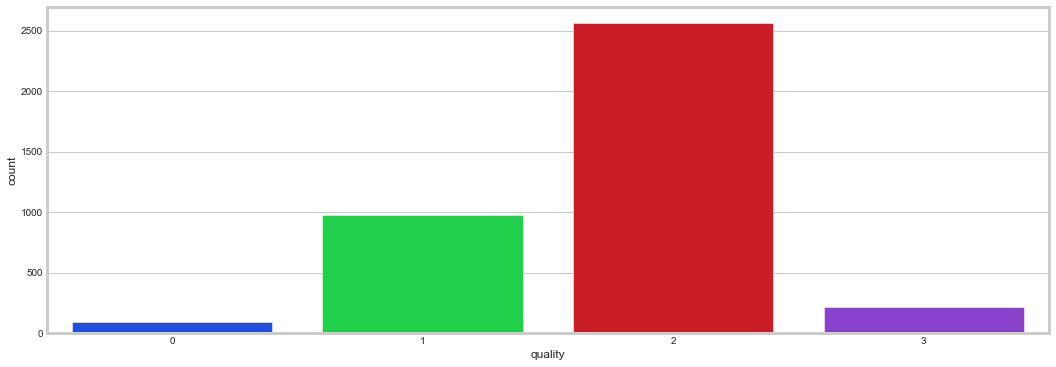

In [536]:
plt.figure(figsize=(16,6))
sns.countplot(x=df['quality'])

### Section 8.3: Logistic Regression Model

In [537]:
# Defining our x and y variables. We are dropping our non numeric variables because based on EDA and Data Mining we didnt see any
# significant relationship between imdb scores and those variables.
# Also dropping actor 1,2 and 3 facebook likes because they are highly correlated with total FB likes, and that can cause
# convergence issues for our model. We also standardize the data to allow the model to converge

X = df.drop(['director_name','actor_2_name','actor_1_name','actor_3_name','movie_title','plot_keywords','movie_imdb_link','language','country','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','imdb_score','quality'], axis=1)
y = df['quality']

X = (X-X.mean()) / (X.std())
X.head()

color  num_critic_for_reviews  duration  director_facebook_likes  \
0  0.187632                4.509447  2.992115                -0.260133   
1  0.187632                1.109835  2.595903                -0.074470   
2  0.187632                3.532361  1.671409                -0.260133   
3  0.187632                5.236205  2.375785                 6.994907   
5  0.187632                2.401849  0.967032                -0.103491   

       gross  num_voted_users  cast_total_facebook_likes  \
0  10.130294         5.177327                  -0.343699   
1   3.684497         2.432011                   1.947167   
2   2.122280         1.139665                   0.017756   
3   5.666761         6.884999                   5.022063   
5   0.307355         0.718497                  -0.499578   

   facenumber_in_poster  num_user_for_reviews    budget      ...        \
0             -0.671814              6.659815  0.856515      ...         
1             -0.671814              2.219417  1.138399      ...         
2             -0.185161              1.622800  0.892310      ...         
3             -0.671814              5.796676  0.914682      ...         
5             -0.185161              0.996841  0.975980      ...         

   genre_Drama  genre_Family  genre_Fantasy  genre_Horror  genre_Musical  \
0    -0.467562     -0.027918      -0.098481     -0.211548      -0.022792   
1    -0.467562     -0.027918      -0.098481     -0.211548      -0.022792   
2    -0.467562     -0.027918      -0.098481     -0.211548      -0.022792   
3    -0.467562     -0.027918      -0.098481     -0.211548      -0.022792   
5    -0.467562     -0.027918      -0.098481     -0.211548      -0.022792   

   genre_Mystery  genre_Romance  genre_Sci-Fi  genre_Thriller  genre_Western  
0      -0.077504      -0.016114      -0.04562       -0.027918      -0.022792  
1      -0.077504      -0.016114      -0.04562       -0.027918      -0.022792  
2      -0.077504      -0.016114      -0.04562       -0.027918      -0.022792  
3      -0.077504      -0.016114      -0.04562       -0.027918      -0.022792  
5      -0.077504      -0.016114      -0.04562       -0.027918      -0.022792  

[5 rows x 35 columns]

In [538]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [539]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "--------------------------------------------------------"

0.7269866247049567
--------------------------------------------------------
[[  0  14  13   0]
 [  0  95 231   0]
 [  0  46 797   3]
 [  0   0  40  32]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        27
          1       0.61      0.29      0.40       326
          2       0.74      0.94      0.83       846
          3       0.91      0.44      0.60        72

avg / total       0.70      0.73      0.69      1271

--------------------------------------------------------


C:\Users\Eric\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [540]:
# evaluate the logistic regression model using 10-fold cross-validation
scores = cross_val_score(lr, X_test, y_test, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.73643411 0.72093023 0.6953125  0.703125   0.65625    0.734375
 0.6984127  0.728      0.728      0.816     ]
0.7216839539497969


### Section 8.4: KNN Classifcation Model

In [541]:
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

In [542]:
X = df.drop(['director_name','actor_2_name','actor_1_name','actor_3_name','movie_title','plot_keywords','movie_imdb_link','language','country','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','imdb_score','quality'], axis=1)
y = df['quality']

X = (X-X.mean()) / (X.std())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# initialize KNeighborsClassifier() and train a KNN Model
knn = KNeighborsClassifier(n_neighbors=7)

knn = knn.fit(X_train, y_train)

#Model evaluation without valdation

#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"

0.7002360346184107
--------------------------------------------------------
[[  0  10  17   0]
 [  6 156 164   0]
 [  2 121 720   3]
 [  0   0  58  14]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        27
          1       0.54      0.48      0.51       326
          2       0.75      0.85      0.80       846
          3       0.82      0.19      0.31        72

avg / total       0.69      0.70      0.68      1271

--------------------------------------------------------


In [543]:
# evaluate the knn model using 10-fold cross-validation
scores = cross_val_score(knn, X_test, y_test, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.65116279 0.63565891 0.71875    0.6640625  0.6953125  0.734375
 0.68253968 0.64       0.656      0.768     ]
0.6845861387966039


### Section 8.5: Linear SVC Classifcation Model

In [544]:
X = df.drop(['director_name','actor_2_name','actor_1_name','actor_3_name','movie_title','plot_keywords','movie_imdb_link','language','country','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','imdb_score','quality'], axis=1)
y = df['quality']

X = (X-X.mean()) / (X.std())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn import svm

svc = svm.SVC(kernel='linear')
svc.fit(X_train,y_train)

#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "--------------------------------------------------------"

0.7269866247049567
--------------------------------------------------------
[[  0  14  13   0]
 [  0  95 231   0]
 [  0  46 797   3]
 [  0   0  40  32]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        27
          1       0.61      0.29      0.40       326
          2       0.74      0.94      0.83       846
          3       0.91      0.44      0.60        72

avg / total       0.70      0.73      0.69      1271

--------------------------------------------------------


C:\Users\Eric\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



### Section 8.6: RBF SVC Classifcation Model

In [545]:
X = df.drop(['director_name','actor_2_name','actor_1_name','actor_3_name','movie_title','plot_keywords','movie_imdb_link','language','country','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','imdb_score','quality'], axis=1)
y = df['quality']

X = (X-X.mean()) / (X.std())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn import svm

svc = svm.SVC(kernel='rbf')
svc.fit(X_train,y_train)

#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "--------------------------------------------------------"

0.7269866247049567
--------------------------------------------------------
[[  0  14  13   0]
 [  0  95 231   0]
 [  0  46 797   3]
 [  0   0  40  32]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        27
          1       0.61      0.29      0.40       326
          2       0.74      0.94      0.83       846
          3       0.91      0.44      0.60        72

avg / total       0.70      0.73      0.69      1271

--------------------------------------------------------


C:\Users\Eric\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



### Section 8.7: Poly SVC Classifcation Model

In [546]:
X = df.drop(['director_name','actor_2_name','actor_1_name','actor_3_name','movie_title','plot_keywords','movie_imdb_link','language','country','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','imdb_score','quality'], axis=1)
y = df['quality']

X = (X-X.mean()) / (X.std())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn import svm

svc = svm.SVC(kernel='poly')
svc.fit(X_train,y_train)

#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "--------------------------------------------------------"

0.7269866247049567
--------------------------------------------------------
[[  0  14  13   0]
 [  0  95 231   0]
 [  0  46 797   3]
 [  0   0  40  32]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        27
          1       0.61      0.29      0.40       326
          2       0.74      0.94      0.83       846
          3       0.91      0.44      0.60        72

avg / total       0.70      0.73      0.69      1271

--------------------------------------------------------


C:\Users\Eric\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



### Section 8.8: Sigmoid SVC Classifcation Model

In [547]:
X = df.drop(['director_name','actor_2_name','actor_1_name','actor_3_name','movie_title','plot_keywords','movie_imdb_link','language','country','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','imdb_score','quality'], axis=1)
y = df['quality']

X = (X-X.mean()) / (X.std())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn import svm

svc = svm.SVC(kernel='sigmoid')
svc.fit(X_train,y_train)

#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "--------------------------------------------------------"

0.7269866247049567
--------------------------------------------------------
[[  0  14  13   0]
 [  0  95 231   0]
 [  0  46 797   3]
 [  0   0  40  32]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        27
          1       0.61      0.29      0.40       326
          2       0.74      0.94      0.83       846
          3       0.91      0.44      0.60        72

avg / total       0.70      0.73      0.69      1271

--------------------------------------------------------


C:\Users\Eric\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



### Section 8.9: Random Forest Classifier

In [548]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['director_name','actor_2_name','actor_1_name','actor_3_name','movie_title','plot_keywords','movie_imdb_link','language','country','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','imdb_score','quality'], axis=1)
y = df['quality']

X = (X-X.mean()) / (X.std())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)


# generate evaluation metrics
print metrics.accuracy_score(y_test, clf.predict(X_test)) #overall accuracy
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print "--------------------------------------------------------"
print metrics.classification_report(y_test, clf.predict(X_test))
print "--------------------------------------------------------"

0.7592446892210858
--------------------------------------------------------
[[  2  12  13   0]
 [  1 166 159   0]
 [  0  69 768   9]
 [  0   0  43  29]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.67      0.07      0.13        27
          1       0.67      0.51      0.58       326
          2       0.78      0.91      0.84       846
          3       0.76      0.40      0.53        72

avg / total       0.75      0.76      0.74      1271

--------------------------------------------------------


In [549]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns),reverse=True)

Features sorted by their rank:
[(0.1396, 'num_voted_users'), (0.092, 'duration'), (0.0887, 'gross'), (0.0868, 'num_user_for_reviews'), (0.0779, 'cast_total_facebook_likes'), (0.0761, 'num_critic_for_reviews'), (0.0757, 'budget'), (0.0651, 'director_facebook_likes'), (0.0625, 'title_year'), (0.0603, 'movie_facebook_likes'), (0.0347, 'facenumber_in_poster'), (0.0198, 'aspect_ratio'), (0.0155, 'genre_Horror'), (0.0145, 'genre_Action'), (0.0133, 'rating_PG13'), (0.0128, 'rating_R'), (0.0104, 'genre_Drama'), (0.0095, 'genre_Comedy'), (0.0093, 'rating_PG'), (0.0061, 'genre_Biography'), (0.0056, 'color'), (0.005, 'genre_Adventure'), (0.0039, 'genre_Crime'), (0.0038, 'rating_G'), (0.0034, 'genre_Documentary'), (0.0026, 'rating_NR'), (0.0018, 'genre_Mystery'), (0.0011, 'genre_Fantasy'), (0.0009, 'genre_Animation'), (0.0007, 'genre_Sci-Fi'), (0.0002, 'genre_Thriller'), (0.0001, 'genre_Musical'), (0.0001, 'genre_Family'), (0.0, 'genre_Western'), (0.0, 'genre_Romance')]


In [550]:
# evaluate the clf model using 10-fold cross-validation
scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.74418605 0.75193798 0.75       0.71875    0.7109375  0.734375
 0.75396825 0.704      0.72       0.752     ]
0.7340154784976005


### Section 8.10: Neural Network Classifier

In [551]:
from sklearn.neural_network import MLPClassifier

X = df.drop(['director_name','actor_2_name','actor_1_name','actor_3_name','movie_title','plot_keywords','movie_imdb_link','language','country','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','imdb_score','quality'], axis=1)
y = df['quality']

X = (X-X.mean()) / (X.std())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

mlp = MLPClassifier(max_iter=10000)
mlp.fit(X_train,y_train)
mlp_y = mlp.predict(X_test)

# generate evaluation metrics
print metrics.accuracy_score(y_test, mlp_y)
print "---------------------------------------------"
print metrics.confusion_matrix(y_test, mlp_y)
print "---------------------------------------------"
print metrics.classification_report(y_test, mlp_y)

0.7718332022029898
---------------------------------------------
[[  5  13   9   0]
 [  7 186 133   0]
 [  1  87 743  15]
 [  0   0  25  47]]
---------------------------------------------
             precision    recall  f1-score   support

          0       0.38      0.19      0.25        27
          1       0.65      0.57      0.61       326
          2       0.82      0.88      0.85       846
          3       0.76      0.65      0.70        72

avg / total       0.76      0.77      0.76      1271



In [552]:
# evaluate the knn model using 10-fold cross-validation
scores = cross_val_score(mlp, X_test, y_test, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.65891473 0.76744186 0.7578125  0.7265625  0.6953125  0.71875
 0.73015873 0.72       0.68       0.752     ]
0.7206952819306016


#### The Random Forest Classifier was the best model that I built in terms of accuracy.

## Section 9: Clustering Analysis

### Section 9.1: K-Means Clustering

In [553]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 5042
Data columns (total 49 columns):
color                        3851 non-null int32
director_name                3851 non-null object
num_critic_for_reviews       3851 non-null float64
duration                     3851 non-null float64
director_facebook_likes      3851 non-null float64
actor_3_facebook_likes       3851 non-null float64
actor_2_name                 3851 non-null object
actor_1_facebook_likes       3851 non-null float64
gross                        3851 non-null float64
actor_1_name                 3851 non-null object
movie_title                  3851 non-null object
num_voted_users              3851 non-null int64
cast_total_facebook_likes    3851 non-null int64
actor_3_name                 3851 non-null object
facenumber_in_poster         3851 non-null float64
plot_keywords                3851 non-null object
movie_imdb_link              3851 non-null object
num_user_for_reviews         3851 non-n

In [555]:
df_norm = df1.copy()

# Normalizing X to allow for model convergence

df_norm = ((df_norm-df_norm.min())/(df_norm.max()-df_norm.min()))

In [556]:
df_norm.head()

color  num_critic_for_reviews  duration  director_facebook_likes  \
0    1.0                0.889163  0.486486                 0.000000   
1    1.0                0.370690  0.456081                 0.024478   
2    1.0                0.740148  0.385135                 0.000000   
3    1.0                1.000000  0.439189                 0.956522   
5    1.0                0.567734  0.331081                 0.020652   

   actor_3_facebook_likes  actor_1_facebook_likes     gross  num_voted_users  \
0                0.037174                0.001563  1.000000         0.524453   
1                0.043478                0.062500  0.406840         0.278865   
2                0.007000                0.017187  0.263080         0.163256   
3                1.000000                0.042187  0.589253         0.677216   
5                0.023043                0.001000  0.096066         0.125579   

   cast_total_facebook_likes  facenumber_in_poster      ...        \
0                   0.007361              0.000000      ...         
1                   0.073622              0.000000      ...         
2                   0.017816              0.023256      ...         
3                   0.162561              0.000000      ...         
5                   0.002852              0.023256      ...         

   genre_Drama  genre_Family  genre_Fantasy  genre_Horror  genre_Musical  \
0          0.0           0.0            0.0           0.0            0.0   
1          0.0           0.0            0.0           0.0            0.0   
2          0.0           0.0            0.0           0.0            0.0   
3          0.0           0.0            0.0           0.0            0.0   
5          0.0           0.0            0.0           0.0            0.0   

   genre_Mystery  genre_Romance  genre_SciFi  genre_Thriller  genre_Western  
0            0.0            0.0          0.0             0.0            0.0  
1            0.0            0.0          0.0             0.0            0.0  
2            0.0            0.0          0.0             0.0            0.0  
3            0.0            0.0          0.0             0.0            0.0  
5            0.0            0.0          0.0             0.0            0.0  

[5 rows x 39 columns]

In [557]:
# clustering analysis using k-means
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [558]:
#Find out cluster centers

k_means.cluster_centers_

array([[ 9.77358491e-01,  2.25750534e-01,  2.63969913e-01,
         3.57744709e-02,  4.41795242e-02,  1.39749976e-02,
         9.01081393e-02,  7.03033594e-02,  2.06397092e-02,
         3.65157471e-02,  7.69838174e-02,  4.58501196e-03,
         8.90597484e-01,  1.73598678e-02,  6.06949277e-01,
         6.57533082e-02,  3.44457285e-02,  6.52256027e-16,
        -2.42861287e-17,  2.74780199e-15,  1.00000000e+00,
        -1.37667655e-14,  3.33584906e-01,  5.50943396e-02,
         2.26415094e-03,  5.50943396e-02,  2.90566038e-01,
         2.26415094e-02,  5.28301887e-03,  1.95471698e-01,
         5.85469173e-18,  8.30188679e-03,  2.26415094e-02,
         7.54716981e-04,  6.03773585e-03,  7.54716981e-04,
         1.50943396e-03,  5.85469173e-18, -1.39862080e-17],
       [ 9.52308857e-01,  2.18286080e-01,  2.71536203e-01,
         4.07008854e-02,  2.66084323e-02,  1.23447838e-02,
         4.30498795e-02,  6.67776847e-02,  1.72361324e-02,
         2.55620302e-02,  7.31212719e-02,  2.78255124e-

In [559]:
#Making a dataframe out of the clusters
df2 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df2.head()

cluster
0        0
1        0
2        0
3        0
4        0

In [560]:
#Adding the cluster column onto our original data
df3 = df_norm.join(df2)
df3.head()

color  num_critic_for_reviews  duration  director_facebook_likes  \
0    1.0                0.889163  0.486486                 0.000000   
1    1.0                0.370690  0.456081                 0.024478   
2    1.0                0.740148  0.385135                 0.000000   
3    1.0                1.000000  0.439189                 0.956522   
5    1.0                0.567734  0.331081                 0.020652   

   actor_3_facebook_likes  actor_1_facebook_likes     gross  num_voted_users  \
0                0.037174                0.001563  1.000000         0.524453   
1                0.043478                0.062500  0.406840         0.278865   
2                0.007000                0.017187  0.263080         0.163256   
3                1.000000                0.042187  0.589253         0.677216   
5                0.023043                0.001000  0.096066         0.125579   

   cast_total_facebook_likes  facenumber_in_poster   ...     genre_Family  \
0                   0.007361              0.000000   ...              0.0   
1                   0.073622              0.000000   ...              0.0   
2                   0.017816              0.023256   ...              0.0   
3                   0.162561              0.000000   ...              0.0   
5                   0.002852              0.023256   ...              0.0   

   genre_Fantasy  genre_Horror  genre_Musical  genre_Mystery  genre_Romance  \
0            0.0           0.0            0.0            0.0            0.0   
1            0.0           0.0            0.0            0.0            0.0   
2            0.0           0.0            0.0            0.0            0.0   
3            0.0           0.0            0.0            0.0            0.0   
5            0.0           0.0            0.0            0.0            0.0   

   genre_SciFi  genre_Thriller  genre_Western  cluster  
0          0.0             0.0            0.0      0.0  
1          0.0             0.0            0.0      0.0  
2          0.0             0.0            0.0      0.0  
3          0.0             0.0            0.0      0.0  
5          0.0             0.0            0.0      0.0  

[5 rows x 40 columns]

In [561]:
# Seeing the characteristics of each cluster
df3.groupby(['cluster']).mean() 

color  num_critic_for_reviews  duration  director_facebook_likes  \
cluster                                                                        
0.0      0.971014                0.226013  0.268185                 0.034753   
1.0      0.973827                0.195105  0.258479                 0.039695   
2.0      0.975884                0.232198  0.266479                 0.041536   
3.0      0.969152                0.177546  0.250895                 0.036997   

         actor_3_facebook_likes  actor_1_facebook_likes     gross  \
cluster                                                             
0.0                    0.039817                0.013485  0.091148   
1.0                    0.031767                0.012334  0.063969   
2.0                    0.046370                0.013881  0.087630   
3.0                    0.022754                0.010625  0.047884   

         num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
cluster                                                                     
0.0             0.073301                   0.020090              0.032648   
1.0             0.059276                   0.017617              0.030778   
2.0             0.077647                   0.020523              0.035407   
3.0             0.052182                   0.014934              0.036273   

             ...        genre_Drama  genre_Family  genre_Fantasy  \
cluster      ...                                                   
0.0          ...           0.142370      0.000000       0.005115   
1.0          ...           0.185018      0.001805       0.012635   
2.0          ...           0.155949      0.000000       0.004823   
3.0          ...           0.185090      0.002571       0.015424   

         genre_Horror  genre_Musical  genre_Mystery  genre_Romance  \
cluster                                                              
0.0          0.028133       0.000000       0.005115       0.000000   
1.0          0.049639       0.000000       0.008123       0.000903   
2.0          0.035370       0.001608       0.008039       0.000000   
3.0          0.035990       0.000000       0.002571       0.000000   

         genre_SciFi  genre_Thriller  genre_Western  
cluster                                              
0.0         0.000853             0.0       0.000000  
1.0         0.003610             0.0       0.000903  
2.0         0.000000             0.0       0.000000  
3.0         0.002571             0.0       0.000000  

[4 rows x 39 columns]

#### Secton 9.1.1: Visualizing factors that impact cluster

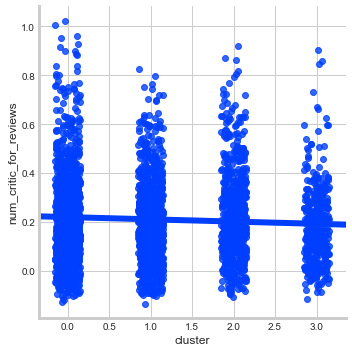

In [562]:
sns.lmplot("cluster", "num_critic_for_reviews", df3, x_jitter=.15, y_jitter=.15)

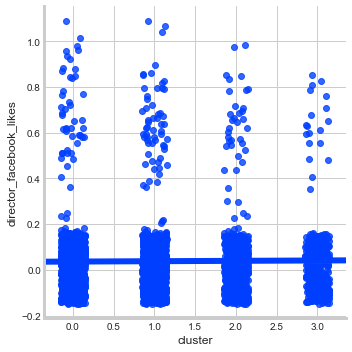

In [563]:
sns.lmplot("cluster", "director_facebook_likes", df3, x_jitter=.15, y_jitter=.15)

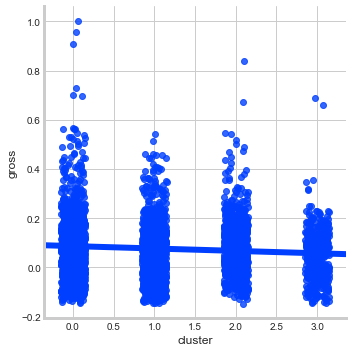

In [564]:
sns.lmplot("cluster", "gross", df3, x_jitter=.15, y_jitter=.15)

#### Section 9.1.2: K-Means with Optimal K using Elbow and Silhouette Methods

Text(0.5,1,'Selecting k with the Elbow Method')

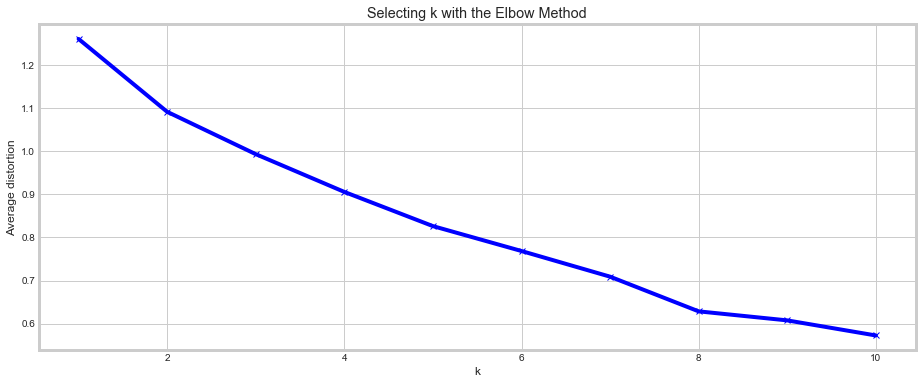

In [565]:
from scipy.spatial.distance import cdist 

K = range(1,11) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.figure(figsize=(14,6))    
plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

In [566]:
#Using silhouette score to determine optimal number of clusters

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

tests = [2, 3, 4, 5, 6, 7, 8]

for k in tests:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(df_norm)
    labels = kmeans_model.labels_
    print metrics.silhouette_score(df_norm, labels, metric='euclidean')

0.24672516321173021
0.31526488935328817
0.2800704570808413
0.29669448624622524
0.3378079612202909
0.3925176405256212
0.4449624389456609


#### 2 clusters appears to be the optimal k value

#### Section 9.1.3: Optimal 2-Means clustering

In [567]:
# clustering analysis using k-means
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [568]:
#Find out cluster centers

k_means.cluster_centers_

array([[ 9.63239518e-01,  2.05142280e-01,  2.59510300e-01,
         3.62989287e-02,  2.66195340e-02,  1.16062500e-02,
         4.16471005e-02,  6.10919845e-02,  1.64039317e-02,
         3.06827138e-02,  6.56324299e-02,  3.02290485e-03,
         8.60813948e-01,  1.39879338e-02,  6.53237056e-01,
         6.24111535e-02,  2.47150338e-02,  1.07552856e-16,
         4.75314232e-16,  3.16413562e-15, -1.01030295e-14,
         1.00000000e+00,  2.17690982e-01,  3.50373349e-02,
         2.87191269e-03,  5.51407237e-02,  2.63067203e-01,
         1.26364159e-01,  3.44629523e-03,  1.96438828e-01,
        -1.49619900e-17,  1.26364159e-02,  7.52441126e-02,
        -2.36356074e-17,  8.61573808e-03, -1.18178037e-17,
         2.29753016e-03,  5.74382539e-04,  5.74382539e-04],
       [ 9.68246445e-01,  1.98365746e-01,  2.54692904e-01,
         3.26444673e-02,  3.81903771e-02,  1.22290640e-02,
         8.93465460e-02,  6.14805417e-02,  1.80429231e-02,
         3.32770532e-02,  6.46530186e-02,  4.31462432e-

In [569]:
#Making a dataframe out of the clusters
df2 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df2.head()

cluster
0        1
1        1
2        1
3        1
4        1

In [570]:
#Adding the cluster column onto our original data
df3 = df_norm.join(df2)
df3.head()

color  num_critic_for_reviews  duration  director_facebook_likes  \
0    1.0                0.889163  0.486486                 0.000000   
1    1.0                0.370690  0.456081                 0.024478   
2    1.0                0.740148  0.385135                 0.000000   
3    1.0                1.000000  0.439189                 0.956522   
5    1.0                0.567734  0.331081                 0.020652   

   actor_3_facebook_likes  actor_1_facebook_likes     gross  num_voted_users  \
0                0.037174                0.001563  1.000000         0.524453   
1                0.043478                0.062500  0.406840         0.278865   
2                0.007000                0.017187  0.263080         0.163256   
3                1.000000                0.042187  0.589253         0.677216   
5                0.023043                0.001000  0.096066         0.125579   

   cast_total_facebook_likes  facenumber_in_poster   ...     genre_Family  \
0                   0.007361              0.000000   ...              0.0   
1                   0.073622              0.000000   ...              0.0   
2                   0.017816              0.023256   ...              0.0   
3                   0.162561              0.000000   ...              0.0   
5                   0.002852              0.023256   ...              0.0   

   genre_Fantasy  genre_Horror  genre_Musical  genre_Mystery  genre_Romance  \
0            0.0           0.0            0.0            0.0            0.0   
1            0.0           0.0            0.0            0.0            0.0   
2            0.0           0.0            0.0            0.0            0.0   
3            0.0           0.0            0.0            0.0            0.0   
5            0.0           0.0            0.0            0.0            0.0   

   genre_SciFi  genre_Thriller  genre_Western  cluster  
0          0.0             0.0            0.0      1.0  
1          0.0             0.0            0.0      1.0  
2          0.0             0.0            0.0      1.0  
3          0.0             0.0            0.0      1.0  
5          0.0             0.0            0.0      1.0  

[5 rows x 40 columns]

In [571]:
# Seeing the characteristics of each cluster
df3.groupby(['cluster']).mean() 

color  num_critic_for_reviews  duration  director_facebook_likes  \
cluster                                                                        
0.0      0.973445                0.191555  0.256721                 0.039044   
1.0      0.972058                0.226043  0.267037                 0.037132   

         actor_3_facebook_likes  actor_1_facebook_likes     gross  \
cluster                                                             
0.0                    0.029913                0.012062  0.060612   
1.0                    0.041263                0.013429  0.088227   

         num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
cluster                                                                     
0.0             0.057509                   0.017162              0.032342   
1.0             0.074132                   0.019936              0.033450   

             ...        genre_Drama  genre_Family  genre_Fantasy  \
cluster      ...                                                   
0.0          ...           0.180992      0.002096       0.011181   
1.0          ...           0.151531      0.000000       0.006985   

         genre_Horror  genre_Musical  genre_Mystery  genre_Romance  \
cluster                                                              
0.0          0.044025       0.000000       0.006289       0.000699   
1.0          0.032778       0.000537       0.006448       0.000000   

         genre_SciFi  genre_Thriller  genre_Western  
cluster                                              
0.0         0.003494             0.0       0.000000  
1.0         0.000537             0.0       0.000537  

[2 rows x 39 columns]

#### Section 9.1.4: Visualizing the characteristics of the 5 clusters

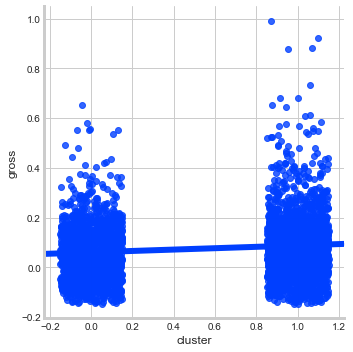

In [572]:
sns.lmplot("cluster", "gross", df3, x_jitter=.15, y_jitter=.15)

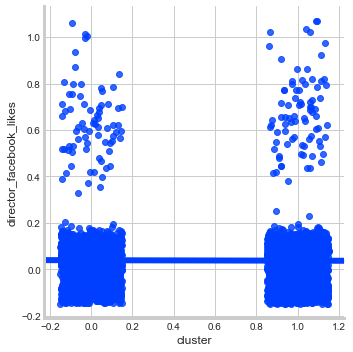

In [573]:
sns.lmplot("cluster", "director_facebook_likes", df3, x_jitter=.15, y_jitter=.15)

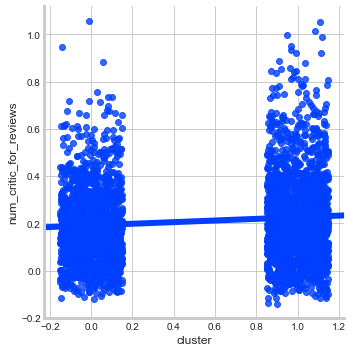

In [574]:
sns.lmplot("cluster", "num_critic_for_reviews", df3, x_jitter=.15, y_jitter=.15)


### Section 9.2: Agglomerative Clustering

In [575]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
agg.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

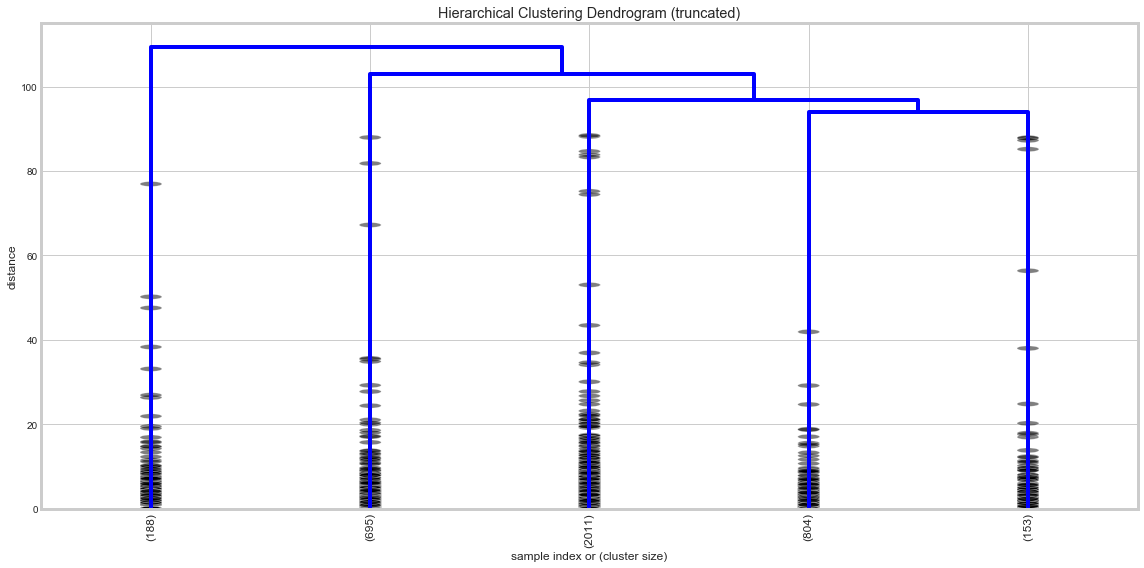

In [576]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')


linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=5,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

## Section 10: Storytelling

### Section 10.1: Recap of Business Intelligence and EDA Storytelling and Conclusions

#### Based on the business intelligence and preliminary analysis performed on this dataset, we can conclude a few major things.


1: The total number of users that voted for a movie had an impact on the movie's score. 

     -In general, the higher the total number of users that voted for a movie, the higher 
      its score, up to a point. After a movie had a score of about 8.5, the total number of users 
      that voted started to taper off. The average number of users that voted per IMDB score 
      category was also important. In general, the higher a movie's score, the higher the number 
      of people that voted on average.

2: Facebook Likes were important.
    
    -Movies that had a higher score also had a greater number of likes on Facebook on average than movies 
     that had a lower score. There is a moderately strong positive correlation between the number of 
     facebook likes and the IMDB score that a movie receives, leading us to believe that more facebook 
     likes are more likely to lead to a higher score.
    
3: The amount of gross revenue matters.

    -Movies that had a higher IMDB score tended to have higher gross revenues on average than those movies 
     with a lower score. This makes sense, because if movies made more gross revenue, that means that more 
     people went to see the movie in theaters or bought the movie on DVD, which means that it is more 
     likely to be a good movie.
     
     
4: Critics' opinions matter.

    -There appeared to be a pretty strong relationship between IMDB score and the number of critical reviews 
     a movie received. As a movie got more and more reviews from critics, the score tended to be higher 
     on average than those movies that did not have as many critical reviews, leading one to draw the 
     conclusion that the more press and media attention that a film recieves, the more likely it is 
     to have a higher IMDB score.
     
5: The Director's popularity plays a factor.
     
     -Director popularity on Facebook tended to help movies get higher scores. Those movies that had 
      high scores also had directors that on average had a higher number of facebook likes than 
      directors of movies that had lower scores. This makes sense because directors that are popular
      tend to make good movies on a pretty consistent basis, which is why they are popular.
      
6: Some predictor variables had little to no impact on a movie's IMDB score.

    -The following factors had little to no impact on a movie's final score.
            
            1. Movie Duration
            2. Country that the movie was produced
            3. Genre
            4. Average Budget was relatively similar across all scores
            5. Content rating did not impact a movie's score at all
            6. Language was not a predictor of score
            7. The number of faces on the movie poster also had no impact on the movie's IMDB score
     


### Section 10.2: Regression Storytelling

- In our regression analysis, we were able to build multiple models that did moderately well in terms of predicting IMDB score based on the factors that we had in our models. I decided not to include dummy variables for Country and Language, beacause that would have made the dataset have over 130 features, and I felt like at that point, even though the R-Squared value would have been high, there would have been severe over-fitting issues, so I decided to exclude those variables from all models.





- The Linear Regression model that I built performed decently well, with an adjusted R-Squared of 0.430. The best regression model that I was able to build was a Random Forest model with an R-Squared value of 0.5803. Based on RFE regression, I found that the most important factors in predicting IMDb score were duration, genre_Action, genre_Biography, genre_Documentary, genre_Drama, genre_Horror, gross, num_critic_for_reviews, num_user_for_reviews, num_voted_users, rating_PG, rating_PG13, rating_R, and title_year.

### Section 10.3: Classification Storytelling

- In the classification section, I built a variety of different classification models, including KNN, SVM, Random Forest, and a Neural Network Classifier. Interestingly, in the SVM section, I messed with the hyper parameters to build different kinds of SVM classifiers, like linear, RBF, Sigmoid, etc, and strangely enough, they all performed exactly the same. 






- The best model that I was able to build was a Random Forest classification model, and it had a 10-fold cross validated accuracy of 0.7326. The Multi-Layer Perceptron Classifier model that I built was a close second, with an 10-fold cross validated accuracy of 0.7228.




- The one commonality among all of my classifiers is that they had an extremely difficult time correctly classifying movies on the extreme ends of the categories, i.e. classifying movies as really bad, or really good. This is likely due to the fact that there were so few movies that fell into those categories that the model didnt have enough data to learn from so its prediction making abilities were handicapped.

### Section 10.4: Clustering Storytelling

- In our clustering analysis section, by using the elbow method and silhouette scores, I determined that the optimal k value for the number of clusters was 2.





- Some of the characteristics that determined which cluster an observation belonged to were:

                1. How much money the movie Grossed, with movies in cluster 0 grossing less, and those in cluster 1 
                   grossing more.
                
                2. The number of critics that reviewed the film, with films in cluster zero having fewer critics
                   reviewing them than films that fell in cluster one.





- Based on our clustering, I would characterize the two clusters as cluster zero containing movies that were less popular, less profitable, and less critically reviewed, where as cluster one was the opposite, with movies that were more popular, grossed more money at the box office, and were more critically reviewed.

#### On my honor as a student, I have neither given nor received any unauthorized aid on this academic work.

Eric VanMeerhaeghe